In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


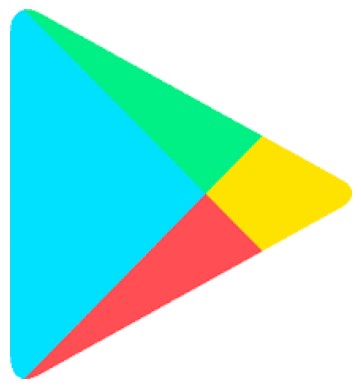

<Figure size 640x480 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/drive/MyDrive/images.png')
plt.imshow(img)
plt.axis('off')
plt.show()
plt.tight_layout()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Project Name**    - PLAY STORE APP REVIEW DATA ANALYSIS



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

The objective of this project is to analyze Android applications from the Google Play Store along with their user reviews. The goal is to uncover patterns and trends related to app ratings, categories, size, and user sentiment — enabling developers and stakeholders to gain actionable insights and make informed decisions that can enhance app performance and user satisfaction.

Two datasets were used in this analysis:

1:The first dataset contains details about Play Store apps, consisting of 10,842 rows and 13 columns, with key fields such as Category, Rating, Reviews, Size, Content Rating, and Genres.

2:The second dataset contains user reviews, with 64,296 rows and 5 columns, including important fields like App, Translated_Review, Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity




# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

1. Top categories of playstore
2. Are majority of apps are paid or free?


3.  Content Rating importance in dataset

1. How does size effect on rating


5. Relation between size and installation




6. Content rating effect on apps


7. Average rating of app


8. Which app category has most installation
9. Top 10 installed apps in any categories.



10. Is last updated has any effect on rating
2. Co-relation between ratings and reviews

1. Is subjectivity and polarity proportional to each other
2. Percentage of review sentiments

1. Change in sentiment polarity for free and paid apps
2. Distribution of apps over year










#### **Define Your Business Objective?**

# **What is exploratory data analysis!!!**
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets for patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset and summarize their main characteristics, often employing data visualization methods. It is an important step in any Data Analysis or Data Science project. It helps determine how best to manipulate data sources to get the answers you need.

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better and make it more attractive and appealing.

The following are the various steps involved in the EDA process:

Problem Statement - We shall brainstorm and understand the given data set. We shall study the attributes present in it and try to do a philosophical analysis about their meaning and importance for this problem.
**Hypothesis** - Upon studying the attributes present in the data base, we shall develop some basic hypothesis on which we can work and play with the data to look for the varied results which we can get out of it.
**Univariate Analysis** - It is the simplest form of analyzing the data. In this we would initially pick up a single attribute and study it in and out. It doesn't deal with any sort of co-relation and it's major purpose is to describe. It takes data, summarizes that data and finds patterns in the data.
**Bivariate Analysis **- This analysis is related to cause and the relationship between the two attributes. We will try to understand the dependency of attributes on each other.
**Multivariate Analysis** - This is done when more than two variables have to be analyzed simultaneously.
**Data Cleaning** - We shall clean the dataset and handle the missing data, outliers and categorical variables.
**Testing Hypothesis** - We shall check if our data meets the assumptions required by most of the multivariate techniques

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # python library mainly used for visualizing missing values in dataset
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [5]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data1=pd.read_csv('/content/drive/MyDrive/Play_Store_DataSET.csv') #loading dataset into google colab
data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
data2=pd.read_csv('/content/drive/MyDrive/User_Reviews_DATASET.csv') #loading dataset2 into google colab
data2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [8]:
##Merging two data set on the basis of app column
merge_df=pd.merge(data1,data2,on='App' ,how='inner')
merge_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122657,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up,NaN,NaN,NaN,NaN
122658,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up,NaN,NaN,NaN,NaN
122659,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up,NaN,NaN,NaN,NaN
122660,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up,NaN,NaN,NaN,NaN


### Dataset First View

In [9]:
# looking for first five rows and all columns using .head()
merge_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


### Dataset Rows & Columns count

In [10]:
#to show the no of rows and columns in a given dataset by using .shape method
merge_df.shape

(122662, 17)

### Dataset Information

In [11]:
###prints the basic info of dataframe i.e Index Info: Type and range of the index.Column Info: Names, data types, and non-null counts for each column.Memory Usage: Approximate memory used by the DataFrame ###
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122662 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Category                122662 non-null  object 
 2   Rating                  122622 non-null  float64
 3   Reviews                 122662 non-null  object 
 4   Size                    122662 non-null  object 
 5   Installs                122662 non-null  object 
 6   Type                    122662 non-null  object 
 7   Price                   122662 non-null  object 
 8   Content Rating          122662 non-null  object 
 9   Genres                  122662 non-null  object 
 10  Last Updated            122662 non-null  object 
 11  Current Ver             122662 non-null  object 
 12  Android Ver             122662 non-null  object 
 13  Translated_Review       72605 non-null   object 
 14  Sentiment           

#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count by using duplicated values present in data set. Detecting and managing duplicates is essential to ensure data accuracy and quality, especially for analysis and modeling.
merge_df.duplicated().sum()

np.int64(81001)

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count by using isnull() and sum() for value counts of the missing values in a column of a given dataset
merge_df.isnull().sum()

,0
App,0
Category,0
Rating,40
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0



--- 1. Missingness Matrix Plot ---


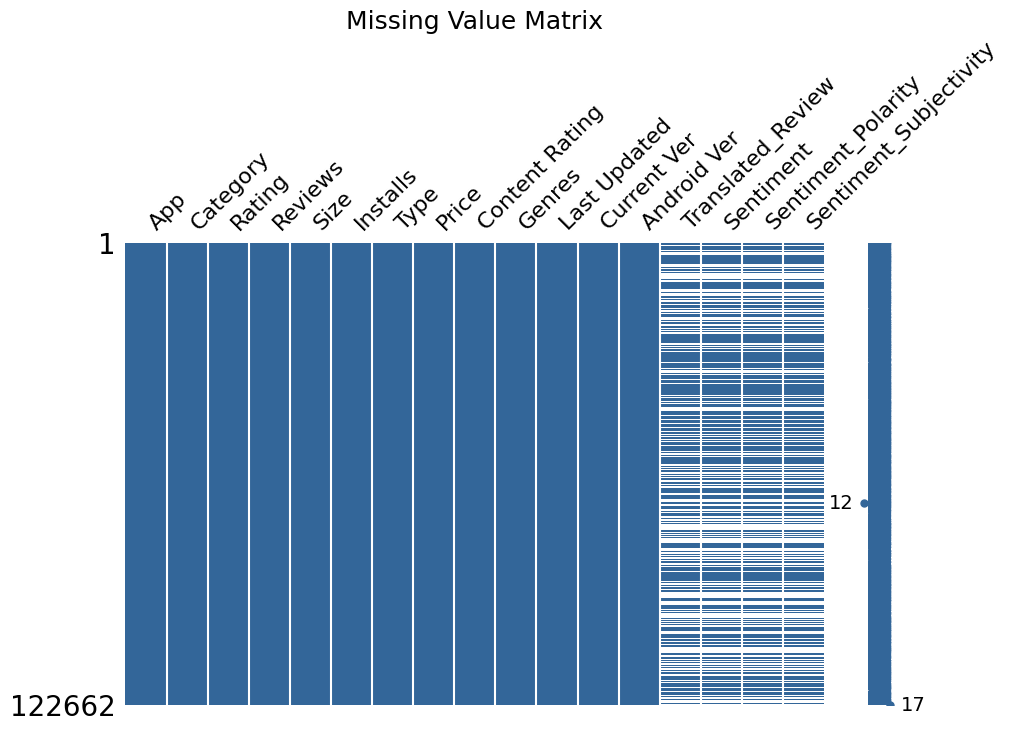

In [14]:
# Visualizing the missing values
print("\n--- 1. Missingness Matrix Plot ---")
msno.matrix(merge_df, figsize=(10, 6), color=(0.2, 0.4, 0.6)) # You can customize color
plt.title("Missing Value Matrix", fontsize=18)
plt.show()



> Interpretation :


* we can clear see the pattern in translated_review,sentiment,sentiment polarity and sentiment subjectivity
* the white lines clearly indicates where is data is missing


* a continous white block indicates that the sensor was down or data is not present in this period







--- Missingness Heatmap ---


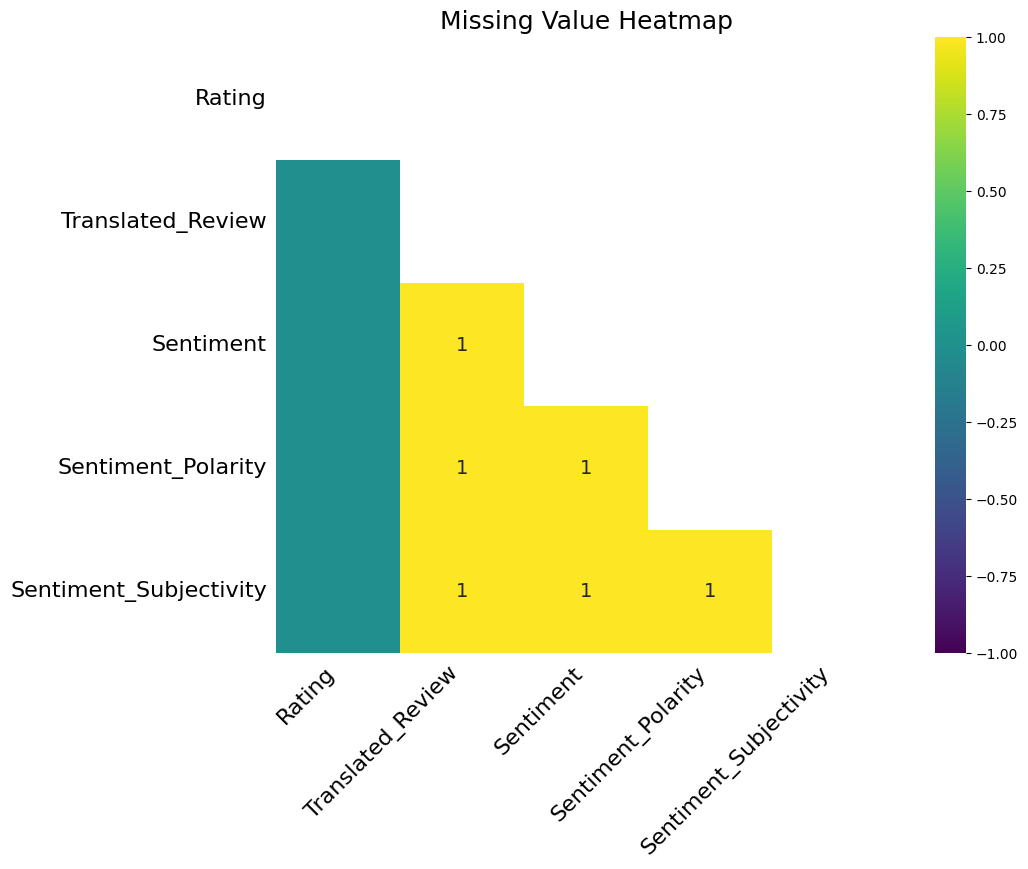

<Figure size 640x480 with 0 Axes>

In [15]:
print("\n--- Missingness Heatmap ---")
msno.heatmap(merge_df, figsize=(10, 8), cmap='viridis')
plt.title("Missing Value Heatmap", fontsize=18)
plt.show()
plt.tight_layout()

interpretation:


* A value of 1 means if one column has a missing value, the other one always does as well in the same row
* This plot is excellent for discovering dependencies in missing data of given data set i.e it cleary showing postive corelation between translated review and sentiment.



### What did you know about your dataset?
In the given data set have total 122662 rows and 17 columns after merging,17 columns we have identified as:

1.App - It tells us about the name of the application with a short description.

2.Category - It gives the category to the app.

3.Rating - It contains the average rating the respective app received from its users.

4.Reviews - It tells us about the total number of users who have given a review for the application.

5.Size - It tells us about the size being occupied the application on the mobile phone.

6.Installs - It tells us about the total number of installs/downloads for an application.

7.Type - IIt states whether an app is free to use or paid.

8.Price - It gives the price payable to install the app. For free type apps, the price is zero.

9.Content Rating - It states whether or not an app is suitable for all age groups or not.

10.Genres - It tells us about the various other categories to which an application can belong.

11.Last Updated - It tells us about the when the application was updated.

12.Current Ver - It tells us about the current version of the application.

13.Android Ver - It tells us about the android version which can support the application on its platform.

14.Translated review - It tells us about the originally written review can be converted into another language

15.Sentiment- It tells us about the opinion of the user on a given app

16.Sentiment polarity- It tells us about the tone of the app It's the most fundamental level of sentiment analysis, categorizing the opinion expressed as positive, negative, or neutral.

17.Sentiment subjectivity refers to the degree to which a piece of text expresses personal opinions, beliefs, emotions, or judgments, as opposed to presenting objective facts or factual information








*Answer* Here

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
merge_df.columns.value_counts()

,count
App,1
Category,1
Rating,1
Reviews,1
Size,1
Installs,1
Type,1
Price,1
Content Rating,1
Genres,1


In [17]:
# Dataset Describe ##by using .describe() which provides a summary of the most important information, including the count, mean, standard deviation, minimum, maximum, and percentiles.
merge_df.describe()

,Rating,Sentiment_Polarity,Sentiment_Subjectivity
count,122622.000000,72615.000000,72615.000000
mean,4.322405,0.157320,0.494162
std,0.284766,0.332652,0.240144
min,2.500000,-1.000000,0.000000
25%,4.200000,0.000000,0.380000
50%,4.400000,0.129167,0.509740
75%,4.500000,0.356250,0.633333
max,4.900000,1.000000,1.000000


### Variables Description

Answer Here

In [18]:
merge_df.value_counts()

App                                                Category  Rating  Reviews  Size                Installs     Type  Price  Content Rating  Genres   Last Updated    Current Ver         Android Ver         Translated_Review                                                                                                                                                       Sentiment  Sentiment_Polarity  Sentiment_Subjectivity
CBS Sports App - Scores, News, Stats & Watch Live  SPORTS    4.3     91031    Varies with device  5,000,000+   Free  0      Everyone        Sports   August 4, 2018  Varies with device  5.0 and up          Normally fave sports suddenly widget work. Every time I shut phone widget load. Without widget, becomes great. It's good widget makes great. FIX IT                     Positive    0.490000           0.650000                  24
                                                                                                                                                                                                             It's good, works. 50% time bugs show everything going (mostly MLB play play). Other that, gets job done.                                                                Positive    0.358333           0.491667                  24
                                                                                                                                                                                                             Although I've using days, far best I've used Good Sports coverage. Visually friendly, easy use, I especially like ability select I want see I want see it. Thanks CBS.  Positive    0.401190           0.633333                  24
                                                                                                                                                                                                             WOW, CBS Sports best apps! It bugs like ES*N app.                                                                                                                       Positive    0.550000           0.650000                  20
                                                                                                                                                                                                             This huge let down. I try watch year crossfit games fails always. It fails worst possible time. CBS disappointment.                                                     Negative   -0.336508           0.598413                  20
                                                                                                                                                                                                                                                                                                                                                                                                                                              ..
Credit Karma                                       FINANCE   4.7     706302   Varies with device  10,000,000+  Free  0      Everyone        Finance  July 31, 2018   Varies with device  Varies with device  Great keep track credit score credit cards. Very bad suggesting auto refinance options.                                                                                 Negative   -0.055000           0.808333                   1
                                                                                                                                                                                                             Great keeping credit. The gives weekly updates score. Great app.                                                                                                        Positive    0.800000           0.750000                   1
                                                                                                             

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable. #by using for loop we can iterate through each value of a column and finally print it using .unique() method to know the distinct values for each column
for col in merge_df.columns:
  print(f"Unique values for column '{col}':")
  print(merge_df[col].unique())
  print("-" * 30)

Unique values for column 'App':
['Coloring book moana' 'Garden Coloring Book'
 '3D Color Pixel by Number - Sandbox Art Coloring' ...
 'Diary with lock password' 'Avakin Life - 3D virtual world'
 'A+ Gallery - Photos & Videos']
------------------------------
Unique values for column 'Category':
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
------------------------------
Unique values for column 'Rating':
[3.9 4.4 4.3 4.1 4.7 4.5 4.2 4.9 4.6 4.  4.8 3.4 3.5 3.8 3.2 3.7 2.6 3.3
 3.  2.5 3.6 3.1 2.7 nan]
------------------------------
Unique values for column 'Reviews':
['967' 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122662 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Category                122662 non-null  object 
 2   Rating                  122622 non-null  float64
 3   Reviews                 122662 non-null  object 
 4   Size                    122662 non-null  object 
 5   Installs                122662 non-null  object 
 6   Type                    122662 non-null  object 
 7   Price                   122662 non-null  object 
 8   Content Rating          122662 non-null  object 
 9   Genres                  122662 non-null  object 
 10  Last Updated            122662 non-null  object 
 11  Current Ver             122662 non-null  object 
 12  Android Ver             122662 non-null  object 
 13  Translated_Review       72605 non-null   object 
 14  Sentiment           

In [21]:
merge_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [22]:
##to see different categories and its value
merge_df['Category'].value_counts().head(10)

,count
Category,
GAME,28360
FAMILY,9947
SPORTS,8840
HEALTH_AND_FITNESS,6562
PRODUCTIVITY,5780
DATING,5756
PHOTOGRAPHY,5660
COMMUNICATION,4460
TRAVEL_AND_LOCAL,4380


In [23]:
merge_df['Type'].value_counts()

,count
Type,
Free,121108
Paid,1554


In [24]:
merge_df['Content Rating'].value_counts() ##in this we can see most of the user are under everyone content rating and lowest in adults only 18+

,count
Content Rating,
Everyone,89635
Teen,17440
Everyone 10+,8060
Mature 17+,7487
Adults only 18+,40


In [25]:
merge_df['Genres'].value_counts() ## most of the user view sports genres and parenting:education are come under least view

,count
Genres,
Sports,10920
Action,8580
Health & Fitness,6562
Casual,5800
Productivity,5780
...,...
Casual;Education,40
Educational;Brain Games,40
Casual;Action & Adventure,40


In [26]:
merge_df['Installs'].value_counts() ##in this we clearly see how much installs are done by user

,count
Installs,
"10,000,000+",28076
"100,000,000+",24740
"1,000,000+",18040
"5,000,000+",16880
"50,000,000+",9420
"100,000+",8064
"500,000+",6488
"1,000,000,000+",3960
"500,000,000+",3334


In [27]:
merge_df.duplicated().sum() ##checking for duplicate values

np.int64(81001)

In [28]:
merge_df.drop_duplicates(inplace=True) ##dropping duplicate values

In [29]:
merge_df.isnull().sum() ##checking for null values

,0
App,0
Category,0
Rating,39
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [30]:
merge_df.dropna(inplace=True) ##dropping null values

In [31]:
merge_df.info() ## checking the info after cleaning null values and duplicates

<class 'pandas.core.frame.DataFrame'>
Index: 40376 entries, 0 to 122617
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     40376 non-null  object 
 1   Category                40376 non-null  object 
 2   Rating                  40376 non-null  float64
 3   Reviews                 40376 non-null  object 
 4   Size                    40376 non-null  object 
 5   Installs                40376 non-null  object 
 6   Type                    40376 non-null  object 
 7   Price                   40376 non-null  object 
 8   Content Rating          40376 non-null  object 
 9   Genres                  40376 non-null  object 
 10  Last Updated            40376 non-null  object 
 11  Current Ver             40376 non-null  object 
 12  Android Ver             40376 non-null  object 
 13  Translated_Review       40376 non-null  object 
 14  Sentiment               40376 non-null  ob

In [32]:
# Remove the '$' sign and convert the 'Price' column to float
merge_df['Price'] = merge_df['Price'].str.replace('$', '', regex=False).astype(float)

# Display the first few rows and the data types to verify the change
display(merge_df.head())
display(merge_df.info())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


<class 'pandas.core.frame.DataFrame'>
Index: 40376 entries, 0 to 122617
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     40376 non-null  object 
 1   Category                40376 non-null  object 
 2   Rating                  40376 non-null  float64
 3   Reviews                 40376 non-null  object 
 4   Size                    40376 non-null  object 
 5   Installs                40376 non-null  object 
 6   Type                    40376 non-null  object 
 7   Price                   40376 non-null  float64
 8   Content Rating          40376 non-null  object 
 9   Genres                  40376 non-null  object 
 10  Last Updated            40376 non-null  object 
 11  Current Ver             40376 non-null  object 
 12  Android Ver             40376 non-null  object 
 13  Translated_Review       40376 non-null  object 
 14  Sentiment               40376 non-null  ob

None

In [33]:
# Remove ',' and '+' from 'Installs' column and convert to integer
merge_df['Installs'] = merge_df['Installs'].str.replace(',', '', regex=False).str.replace('+', '', regex=False).astype(int)

merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40376 entries, 0 to 122617
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     40376 non-null  object 
 1   Category                40376 non-null  object 
 2   Rating                  40376 non-null  float64
 3   Reviews                 40376 non-null  object 
 4   Size                    40376 non-null  object 
 5   Installs                40376 non-null  int64  
 6   Type                    40376 non-null  object 
 7   Price                   40376 non-null  float64
 8   Content Rating          40376 non-null  object 
 9   Genres                  40376 non-null  object 
 10  Last Updated            40376 non-null  object 
 11  Current Ver             40376 non-null  object 
 12  Android Ver             40376 non-null  object 
 13  Translated_Review       40376 non-null  object 
 14  Sentiment               40376 non-null  ob

In [34]:
merge_df['category_installs']=merge_df.groupby('Category')['Installs'].transform('sum') #by making new column as category_installs we can clearly understand the different category having no of installs
merge_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,category_installs
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,716700000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,716700000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000,716700000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000,716700000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000,716700000


In [35]:
merge_df['Last_Updated']=merge_df['Last Updated'].astype('datetime64[ns]') ##convert dtype of last updated into datetime
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40376 entries, 0 to 122617
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     40376 non-null  object        
 1   Category                40376 non-null  object        
 2   Rating                  40376 non-null  float64       
 3   Reviews                 40376 non-null  object        
 4   Size                    40376 non-null  object        
 5   Installs                40376 non-null  int64         
 6   Type                    40376 non-null  object        
 7   Price                   40376 non-null  float64       
 8   Content Rating          40376 non-null  object        
 9   Genres                  40376 non-null  object        
 10  Last Updated            40376 non-null  object        
 11  Current Ver             40376 non-null  object        
 12  Android Ver             40376 non-null  object    

### What all manipulations have you done and insights you found?

Under this section first we check info of column and get head value after that we check the different categories, no of installs, type of apps and also genres by using value counts. for different purposes.As we have check most no of installs and which category has most installs besides this we also consider the type of apps i.e free or paid by which user mostly like. After that we handle the duplicates and null values which are present in our data set.After by using group by and transform() we analysis the total no installs for different category.Finally convert the dtypes of different column into desired dtypes for further analysis and visulization

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [36]:
#Top categories on playstore
merge_df.groupby("Category")["App"].count().sort_values(ascending= False)

,App
Category,
GAME,9293
FAMILY,3550
HEALTH_AND_FITNESS,1888
TRAVEL_AND_LOCAL,1765
TOOLS,1662
PRODUCTIVITY,1655
SPORTS,1610
FINANCE,1581
PHOTOGRAPHY,1528


In [37]:
x = merge_df['Category'].value_counts()
y = merge_df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

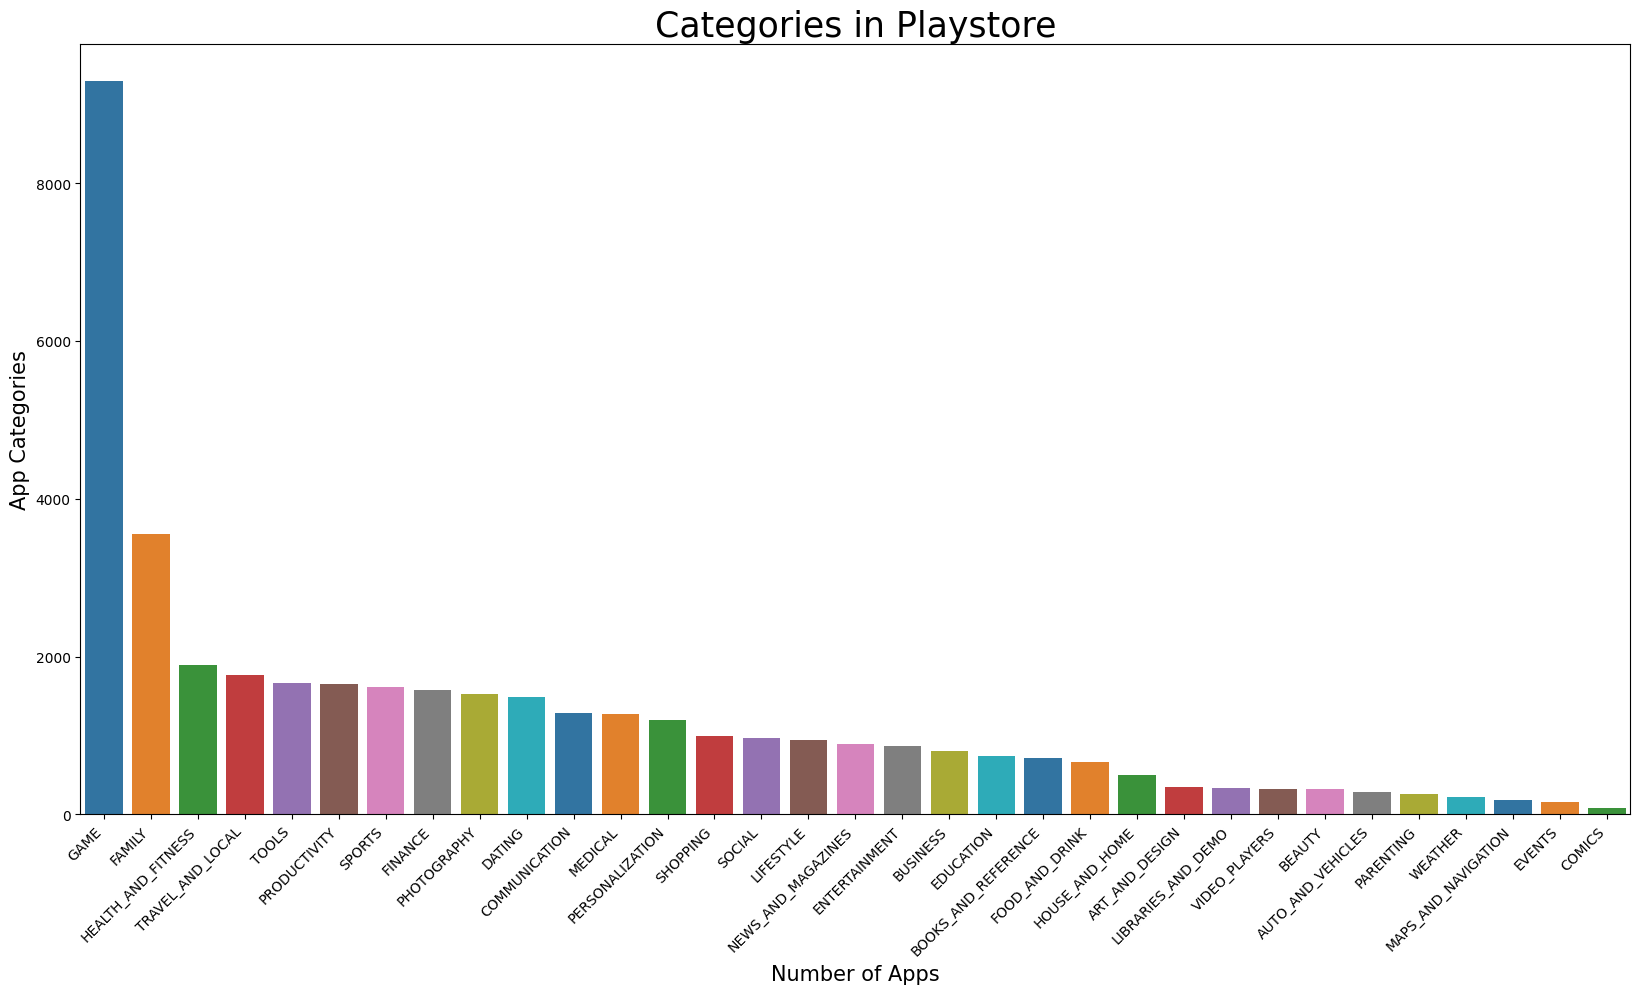

In [38]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Categories in Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

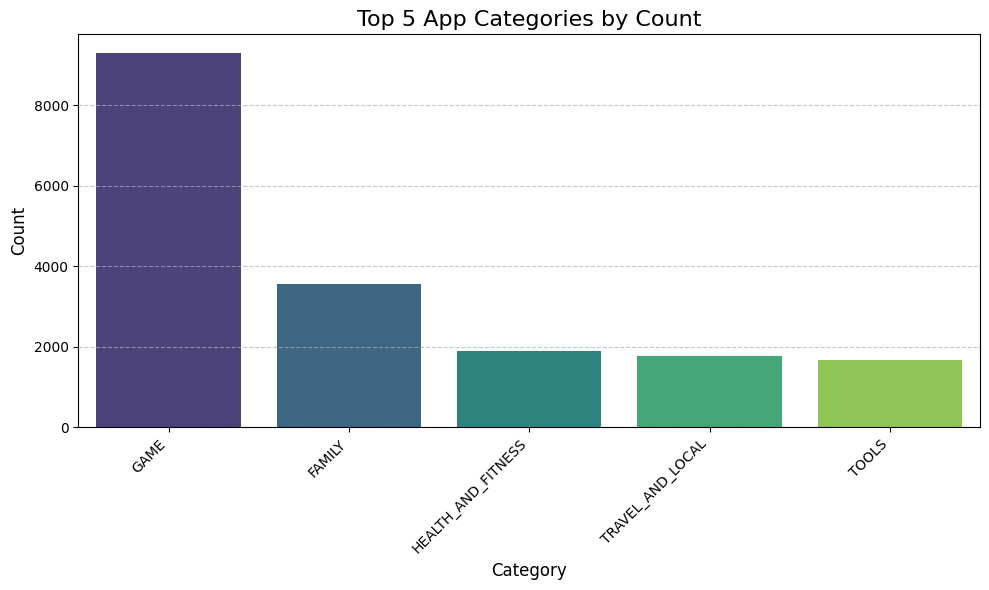

In [39]:
#Top 5 categories in playstore.
# Get the top 5 categories
top_categories = merge_df['Category'].value_counts().head(5)

plt.figure(figsize=(10, 6)) # Set the figure size for better readability

# Create the bar plot using seaborn
# x=top_categories.index refers to the category names
# y=top_categories.values refers to the counts
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')

# Add titles and labels for clarity
plt.title('Top 5 App Categories by Count', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels if they are long or overlapping
plt.xticks(rotation=45, ha='right') # 'ha' means horizontal alignment for rotated labels

plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

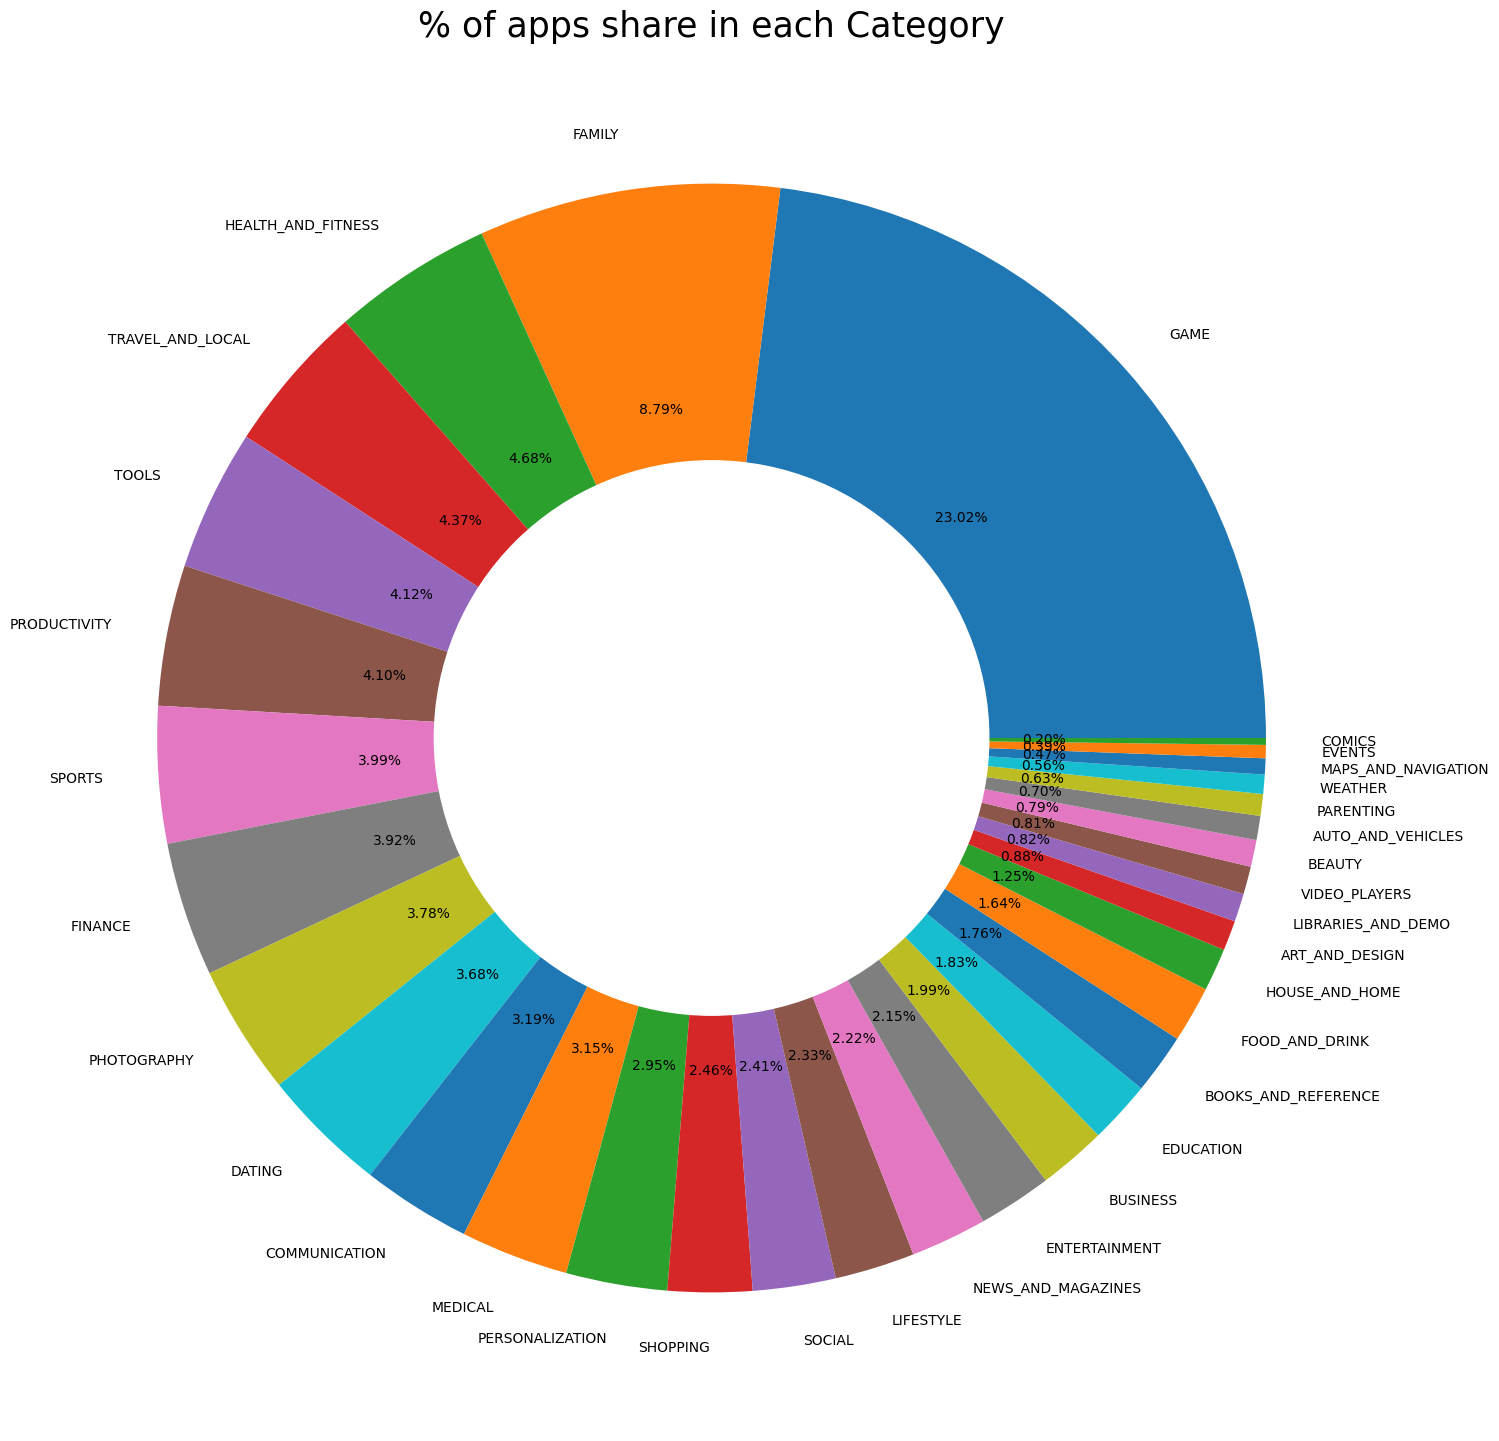

In [40]:
# Percentage of apps belonging to each category in the playstore
plt.figure(figsize=(18,18))
plt.pie(merge_df.Category.value_counts(), labels=merge_df.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

##### 1. Why did you pick the specific chart?

* To check top categories in playstore and also to check which top 5 categories which are mostly choose by user in playstore

##### 2. What is/are the insight(s) found from the chart?

In this bar chart we clearly see the trend in category:

1.  In this we clearly see that there are 33 category present in which Game section in category are mostly like by user in playstore

2.   After game section second most section liked is family section and others section category are mostly same as compare to game section

3. we can clearly see comics category is least choose by user in playstore


4. we also see percentage of apps distribution in category









##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Yes this insights will definitely give a positive impact on business

#### Chart - 2

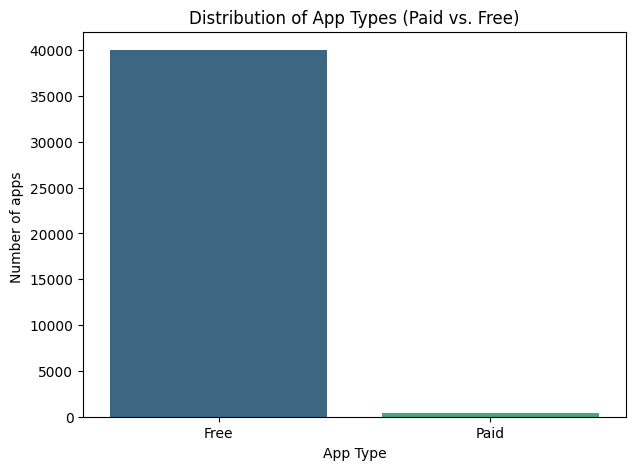

In [41]:
#most apps are paid or free?
# Chart - 2 visualization code
# Count the occurrences of each 'Type'
apps_counts = merge_df['Type'].value_counts()

# Create the bar chart
plt.figure(figsize=(7, 5))
sns.barplot(x=apps_counts.index, y=apps_counts.values, palette='viridis')
plt.title('Distribution of App Types (Paid vs. Free)')
plt.xlabel('App Type')
plt.ylabel('Number of apps ')
plt.show()

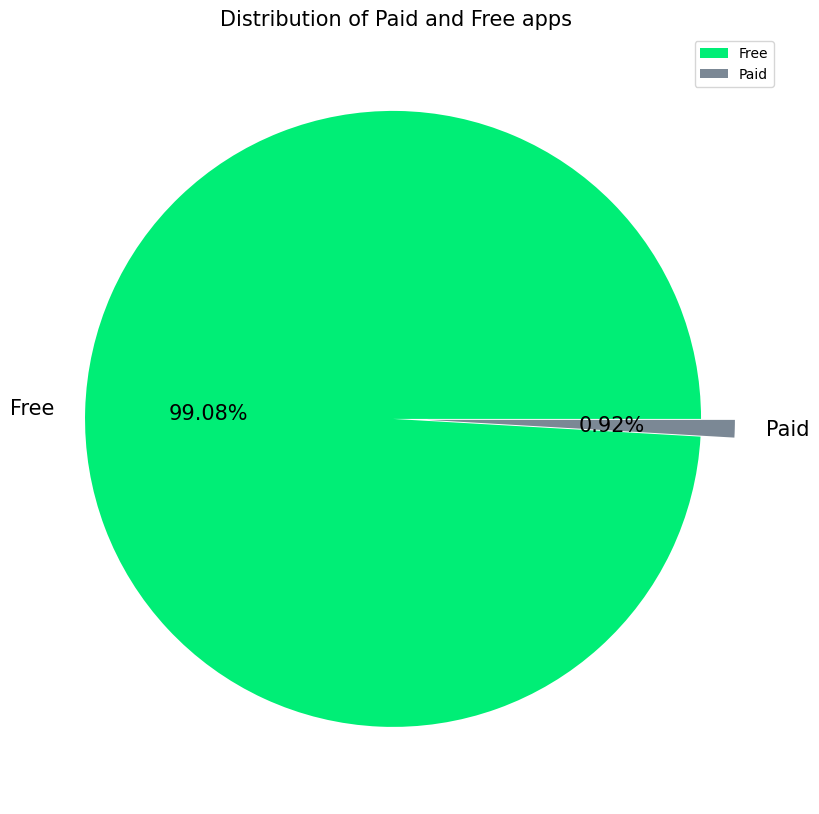

In [42]:
data = merge_df['Type'].value_counts()
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

TO check the types of app and also show which type has majority

##### 2. What is/are the insight(s) found from the chart?





1. In this visualization we can clearly say most of the apps are free which around 120000.
2. And in pie chart we clearly say 98.73% apps are free in playstore and 1.27% are paid.



##### 3. Will the gained insights help creating a positive business impact?

* This could be a positive sign if your business strategy is explicitly:

 **User Acquisition Focused:** You're intentionally using free apps as a
massive user acquisition tool, aiming to build a large user base that you can then monetize through advertising, in-app purchases, or by directing them to other paid services.

 **Platform Building:** You're building an ecosystem where free apps serve as a gateway to a larger platform, service, or community that has other revenue streams.

 **Brand Building/Awareness:** The goal isn't direct sales but rather brand visibility, education, or to complement another core business.


**Are there any insights that lead to negative growth? Justify with specific reason.**

 It indicates a negative impact on direct revenue-based business growth from app sales.
   
   **Limited Direct Revenue:** With such a high percentage of free apps, direct income from app purchases is minimal. Only a tiny fraction (1.27%) of your app portfolio is generating direct sales revenue.
   
  ** Reliance on Alternative Models:** This distribution suggests that your business growth, if any, must heavily rely on alternative monetization strategies for your free apps, such as:

   **In-app purchases (IAP):** Selling virtual goods, subscriptions, or premium features within the free apps.

  **Advertising:** Displaying ads within the free apps.

  Freemium model: Offering a basic free version to attract users, then converting a small percentage to paid premium features or subscriptions.

  Data monetization: Collecting and selling anonymized user data (though this has privacy implications and regulations).
   



#### Chart - 3

In [43]:
# Size vs Rating
# Clean and convert 'Size' column to numeric (MB)
# Handle 'Varies with device' by converting to NaN
merge_df['Size'] = merge_df['Size'].replace('Varies with device', np.nan)

# Convert 'Size' to numeric, replacing 'M' and 'k' and handling errors
merge_df['Size'] = merge_df['Size'].astype(str).str.replace('M', '', regex=False).str.replace('k', '', regex=False)
merge_df['Size'] = pd.to_numeric(merge_df['Size'], errors='coerce')

# Drop rows with NaN in 'Size' after conversion
merge_df.dropna(subset=['Size'], inplace=True)



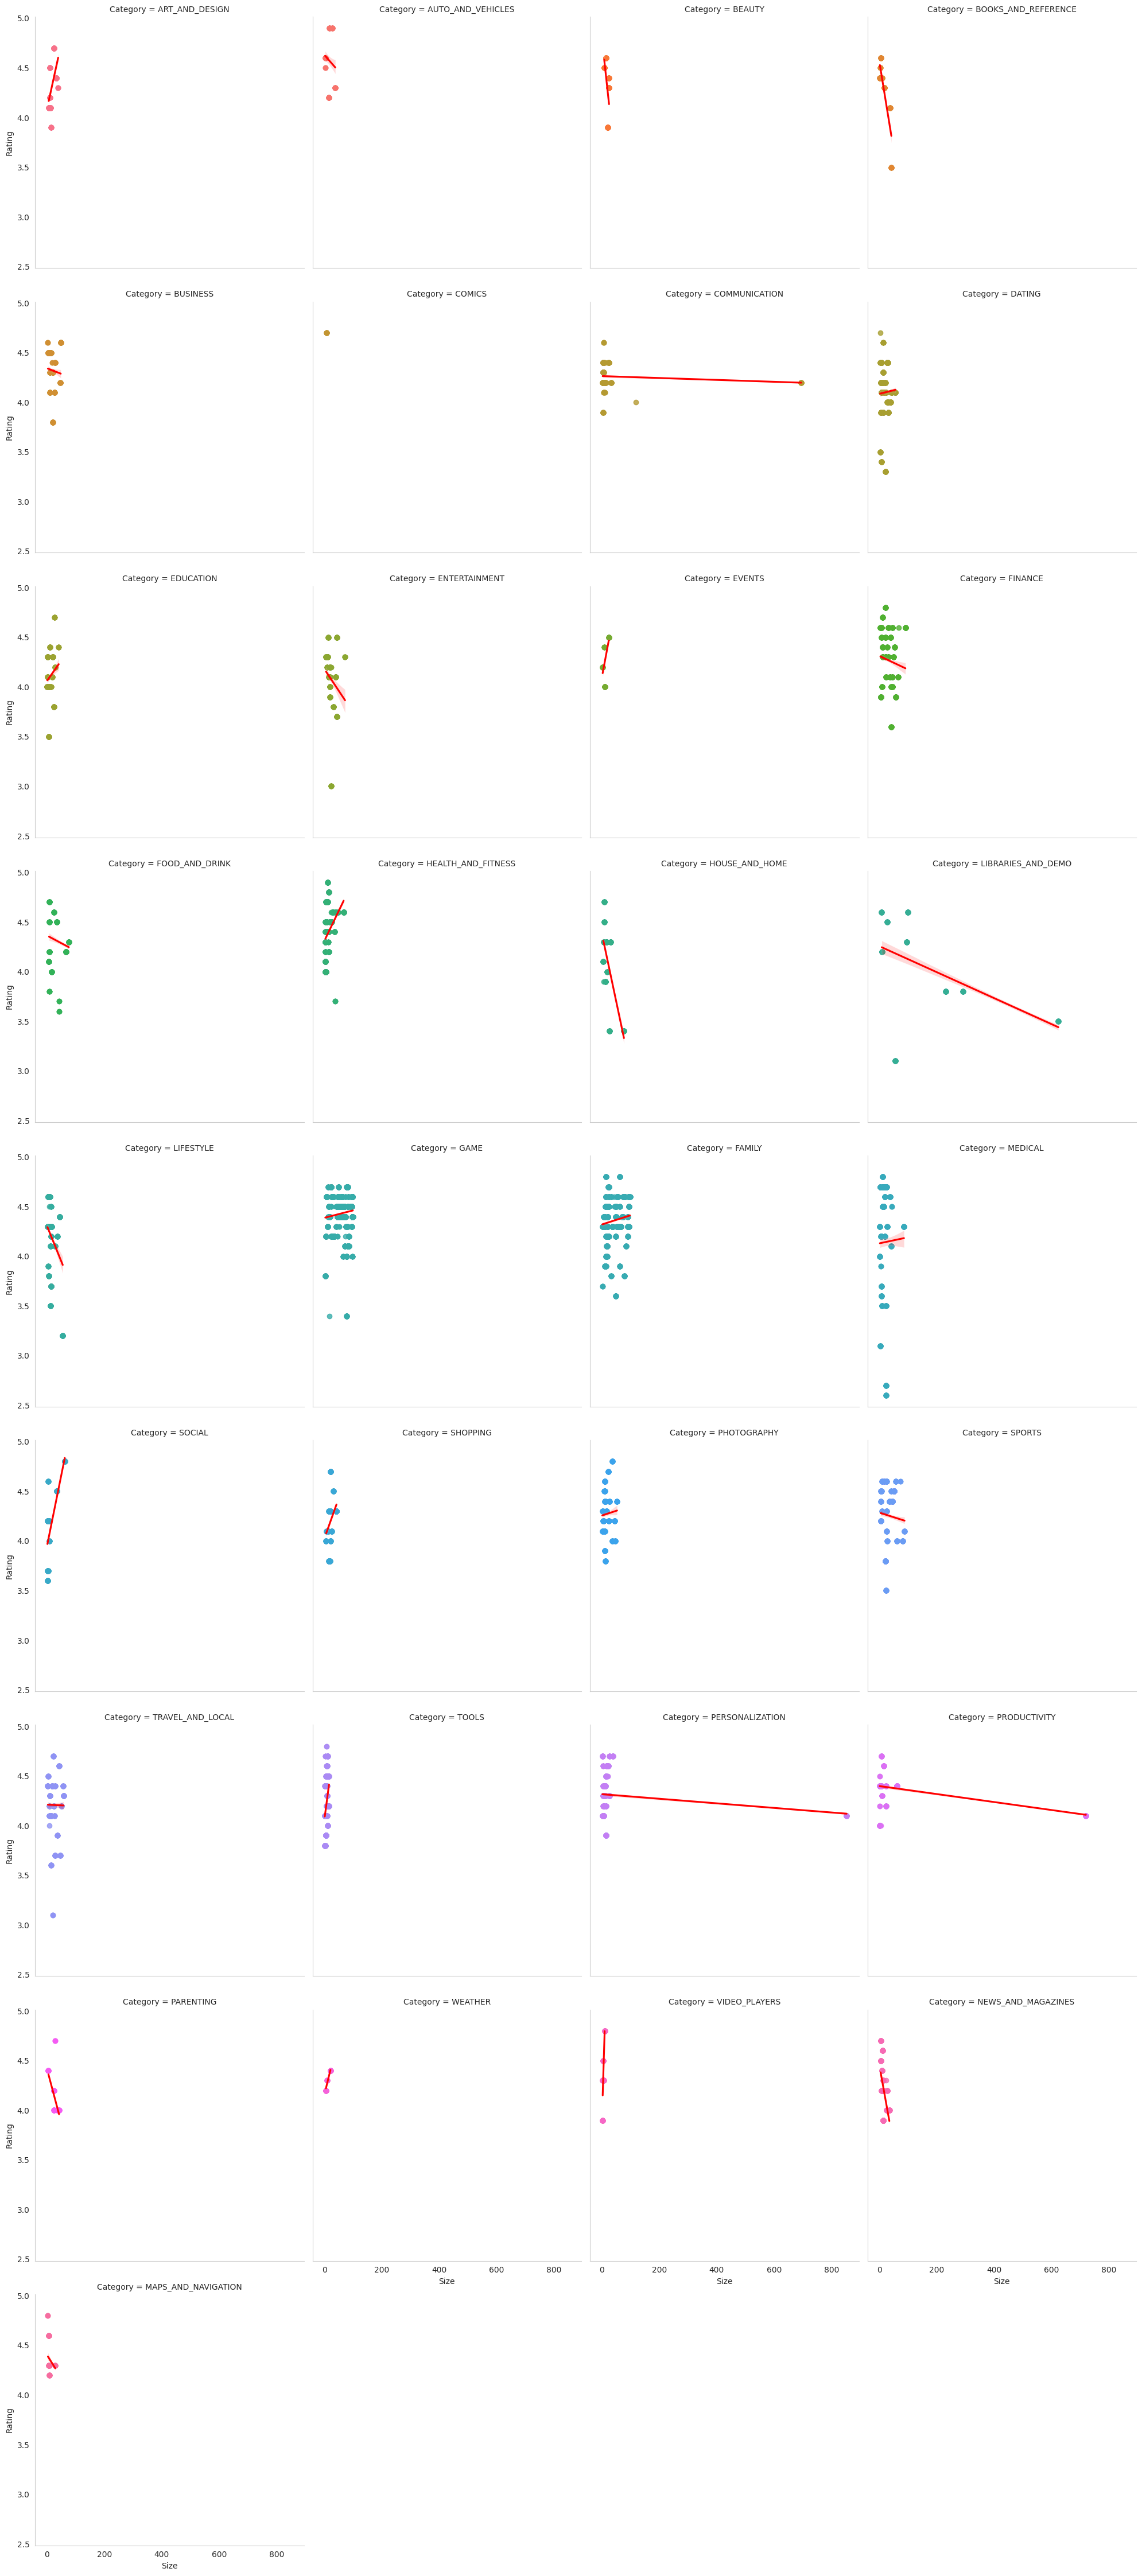

In [44]:

#Size vs Rating visualization using lmplot
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(y='Rating',x='Size',data=merge_df,col="Category", hue="Category",col_wrap=4,line_kws={'color': 'red'})
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To check the impact of Size over rating and how its varies.

##### 2. What is/are the insight(s) found from the chart?



1. It appears the relationship between app size and rating is not consistent across all categories.Some categories might show a slight positvie trend and others might show a shlight negative trend
2. Most concentration of apps in the lower to mid range size with a wide distribution of ratings.

3. For many categories the ratings seem to be clustered around the higher values regardless of the app size.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

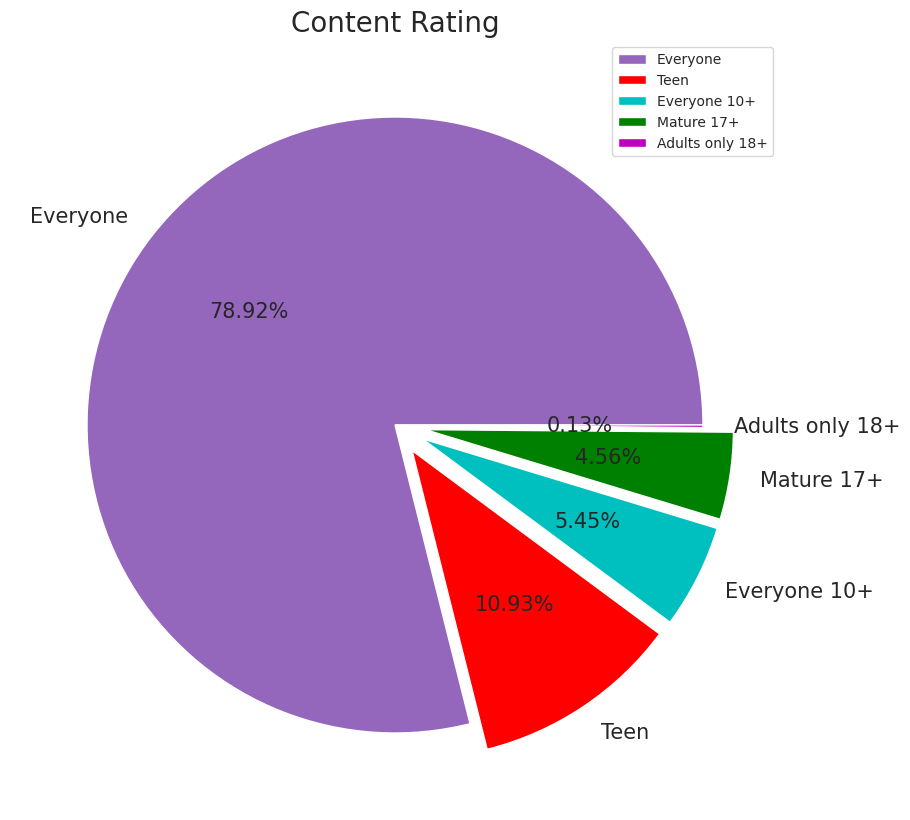

In [45]:
# Which category of Apps from the Content Rating column are found more on playstore!!!
data = merge_df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0)
colors = ['C4', 'r', 'c', 'g', 'm']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

To check the category of apps in content rating are found more

##### 2. What is/are the insight(s) found from the chart?



1. we found that 77.46% apps are fall under everyone section i.e. it can be used by everyone.
2. and 0.09% are under adults 18+ section i.e. it has age restriction in playstore.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It will give a positive impact on business as most of apps can be used by approx 78% user in playstore as it has no restrictions.so that any one can used most of the apps in playstore.

*italicized text*#### Chart - 5

Text(0.5, 1.0, 'Total app installs in each category')

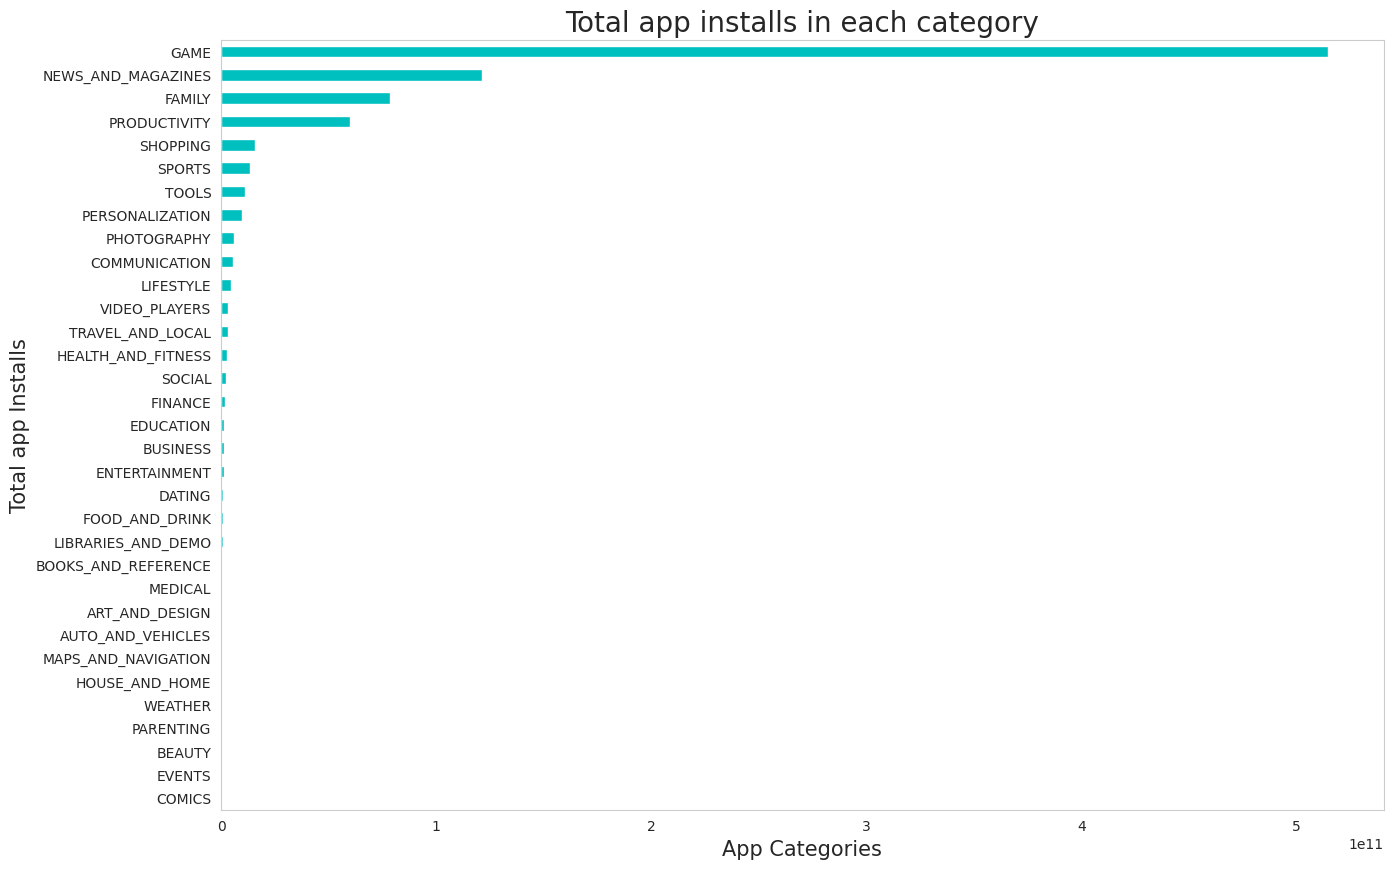

In [46]:
# Which category app has most number of installs!!
a = merge_df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'c', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

##### 1. Why did you pick the specific chart?

To check which category in playstore has the most no of installs

##### 2. What is/are the insight(s) found from the chart?

we can clearly see that games,photography and social has the most apps installs in playstore compared to other categories app.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Categories like 'GAME', 'PHOTOGRAPHY', and 'SOCIAL' have the highest total number of installs. This indicates a strong positive impact for apps within these categories, suggesting high user demand and potential for growth.

Conversely, categories like 'EVENTS' and 'COMICS' have significantly lower total installs. This could indicate a negative impact or lower demand for apps in these categories, making it potentially more challenging for new apps to gain a large user base.

Overall, we can sat that the category an app belongs to appears to have a significant impact on the potential number of installs, with some categories being much more popular than others

#### Chart - 6

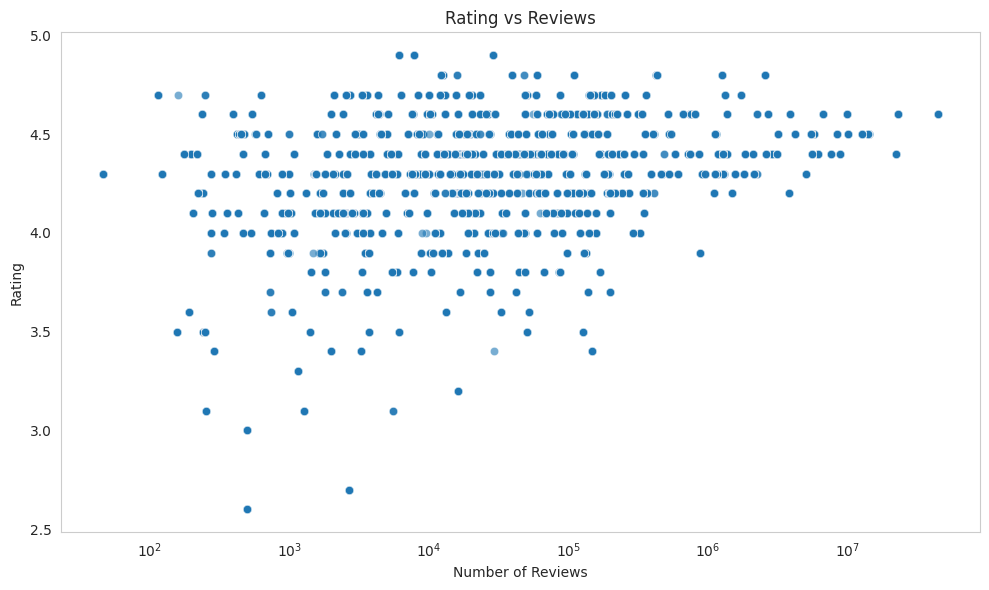

In [47]:
# Rating vs Reviews visualization
# Convert 'Reviews' column to numeric
merge_df['Reviews'] = pd.to_numeric(merge_df['Reviews'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Rating', data=merge_df, alpha=0.6)
plt.title('Rating vs Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.xscale('log') # Use log scale for Reviews due to large range
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

To check the relation between ratings and review in playstore.

##### 2. What is/are the insight(s) found from the chart?



1.In this scatter we see a general trend where apps is more reviews tend to have higher ratings.

1.But there is wide spread of ratings for apps with fewer reviews.

3.Most of reviews are concentrated who has ratings above 4.5 and above.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**Apps with high ratings and reviews clearly indicate strong user satisfaction.Which leads to built trust,higher downloads and encouraging new users to install the app.
Apps having many reviews, even if some are negative it provide a valuable feedback for developers to identity the apps bugs and further improve it and leads to better app quality potentially get higher ratings in future.

**Negative Business Impact**: Apps with many reviews but lower ratings clearly indicates the negative user dissatisfaction over apps.This can deter users potential and damage the apps reputation,which ultimately leads to decrease in downloads and increase in uninstalls of app.

#### Chart - 7

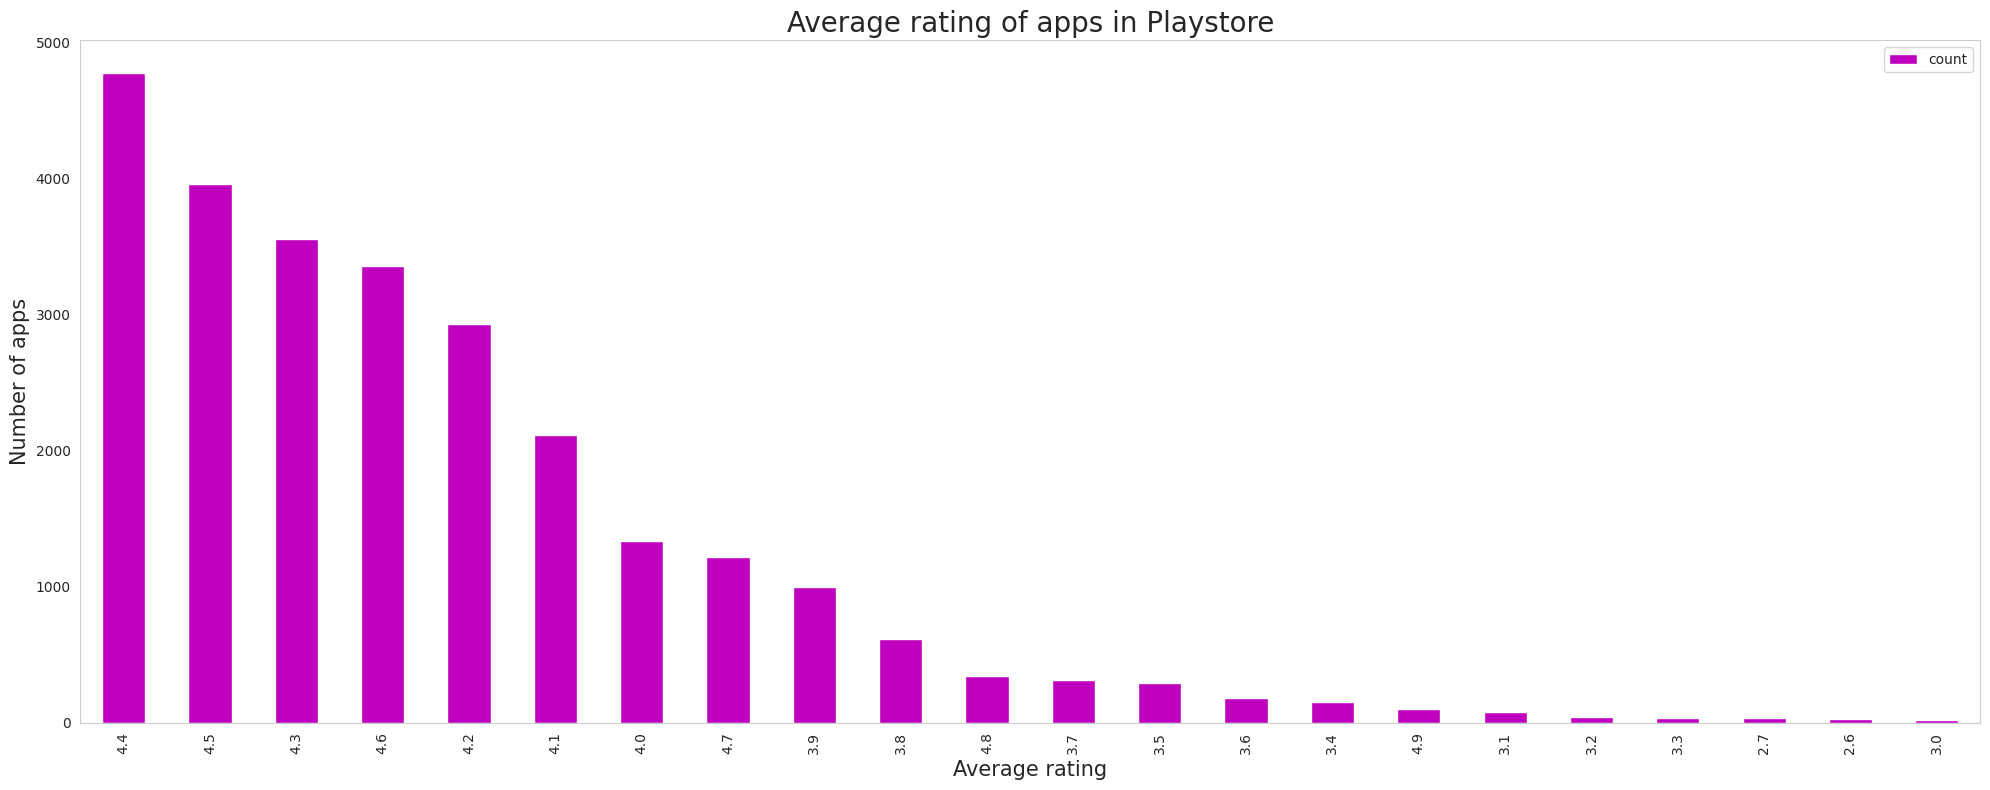

In [48]:
# Average Ratings of apps
merge_df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'm' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()
plt.tight_layout()


We can represent the ratings in a better way if we group the ratings between certain intervals. Here, we can group the rating as follows:

4-5: Top rated

3-4: Above average

2-3: Average

1-2: Below average

In [49]:
def Rating_app(val): ## defining the function to group the categories.
  '''
  This function help us to categories the rating from 1 to 5
  as Top_rated,Above_average,Average & below Average by using if condition.
  '''
  if val>=4:
    return 'Top rated'
  elif val>3 and val<4:
    return 'Above Average'
  elif val>2 and val<3:
    return 'Average'
  else:
    return 'Below Average'

In [50]:
# Applying lambda function.
merge_df['Rating_group']=merge_df['Rating'].apply(lambda x: Rating_app(x))

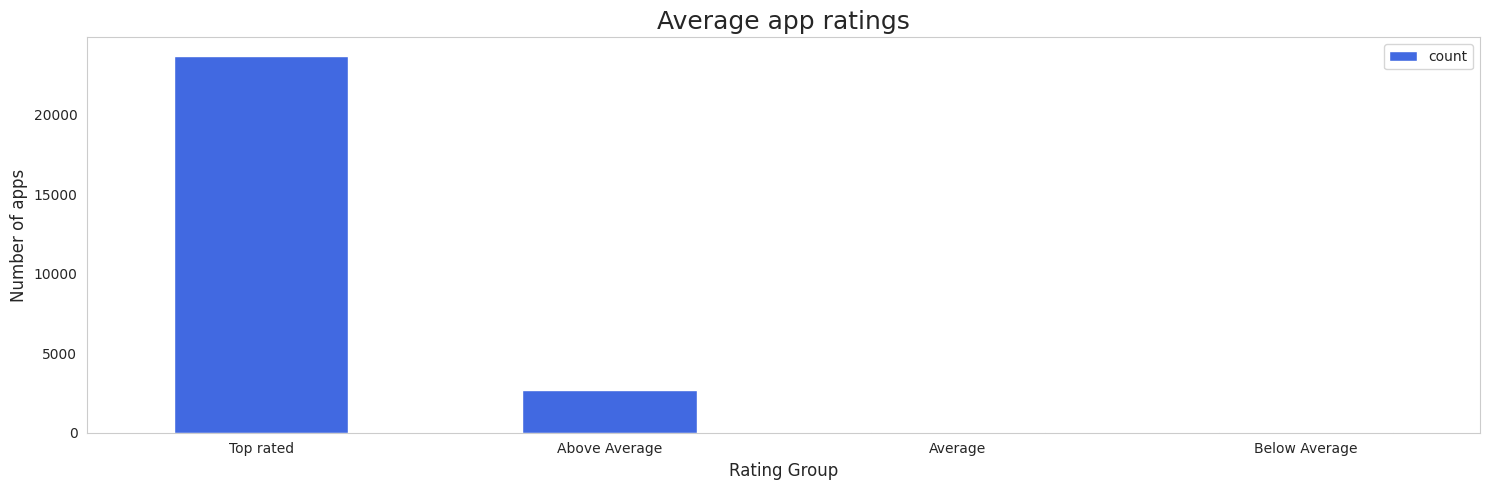

In [51]:
# Average app ratings visualization using bar plot
merge_df['Rating_group'].value_counts().plot.bar(figsize=(15,5), color = 'royalblue')
plt.xlabel('Rating Group', fontsize = 12)
plt.ylabel('Number of apps', fontsize = 12)
plt.title('Average app ratings', fontsize = 18)
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To check average rating of the apps in playstore.

##### 2. What is/are the insight(s) found from the chart?



1.  Based on this bar chart.Large majority of apps are fall under "Top rated" category (ratings 4-5) this indicate that most apps in dataset has high ratings.
2.  A significant no. of apps are fall under "above average" category(ratings 3-4).


1.  Very few apps are in "average" category(ratings 2-3) and "Below category" (ratings 1-2) categories.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business Impact:**A high average rating generally indicates the users are satisfied with the apps they are downloading that can lead to positive word-of-mouth and user retention.

Apps with higher rating are often favored by the app store algorthims and user browsing the store it also make it easier and cheaper to acquire new users.

Consistently high ratings build a strong brand reputation for developers and publishers,making users more likely to try their other apps.

**Negative business Impact:** With large no. of apps being highly rated, it becomes more challenging for new apps or apps with average ratings to stand out as bar for user expectations is set high.
If most apps have similar high ratings,it becomes harder for a business to differentiate its app based soley on rating.

Businesses face continous pressure to maintain high app quality and user satisfaction to keep their ratings upto bar as slighlty drop in rating can significantly impact visibility and user trust.

#### Chart - 8

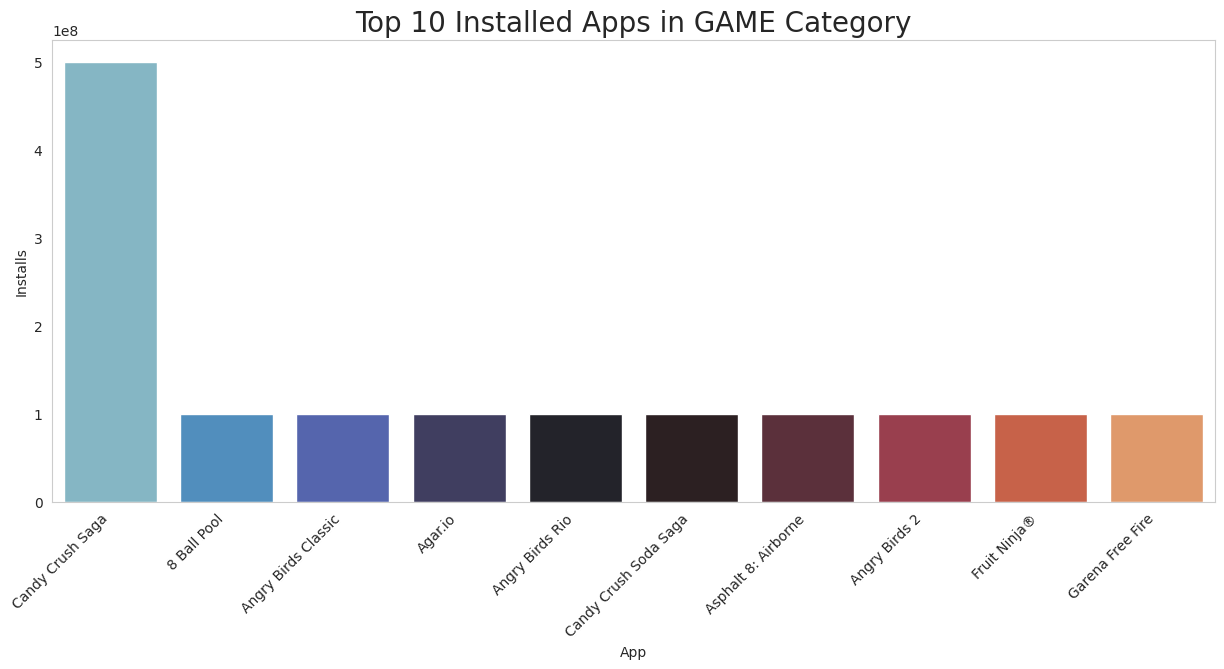

<Figure size 640x480 with 0 Axes>

In [52]:
# Top 10 installed apps in any categories in playstore
def findtop10incategory(str):
    str = str.upper()
    # Filter by category and group by app to get unique apps with their installs
    category_apps = merge_df[merge_df['Category'] == str].groupby('App')['Installs'].mean().reset_index()
    # Sort by installs and select the top 10
    top10apps = category_apps.sort_values(by='Installs', ascending=False).head(10)

    plt.figure(figsize=(15,6), dpi=100)
    plt.title('Top 10 Installed Apps in ' + str + ' Category',size = 20)
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')
    plt.show()
    plt.tight_layout()

# Example usage: Call the function with a category name, e.g., 'GAME'
findtop10incategory('GAME')

##### 1. Why did you pick the specific chart?

To check the top 10 apps installed in any categories i.e. Game category as it mostly installed

##### 2. What is/are the insight(s) found from the chart?



1. In this chart we can clearly shows the apps with the highest number of installs within the game category. we can also see app name in x-axis and installs in y-axis
2. "Candy Crush Saga" have extremely high install numbers compared to the other in the this chart.


3. Others apps have mostly similar number of installs
2. This highlight which game has achieved massive user adoption and popularity.







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive impact:**top apps success can motivate developers to develop more unique game that can capture a significant market.

As due to top installs it set a benchmark for developers to analyze apps to understand what attracts users and identify its key features to finally develop more apps like this

**Negative impact:** A the dominance of apps indicates a highly competitive and potential saturated market oftenly at the top it is extremely challenging for new games to break into the top ranks and gain significant visibility and installs.
 Due to monopoly of apps its required a siginificant marketing investment to acquire users, which can be a  barrier for smaller developers or those with limited budgets.

#### Chart - 9

In [53]:
# Top apps that are free!!!
free_df=merge_df[merge_df['Type']=='Free']

In [54]:
# Creating a df for top free apps

# Group by App and sum the installs to get total installs per app
app_installs = free_df.groupby('App')['Installs'].sum().reset_index()

# Sort by total installs and select the top 10 apps
top_free_apps = app_installs.nlargest(10, 'Installs', keep='first')

display(top_free_apps.head(10))

,App,Installs
485,Google News,120000000000
220,Candy Crush Saga,100000000000
13,8 Ball Pool,67200000000
329,Dropbox,57000000000
525,Helix Jump,55800000000
77,Angry Birds Classic,53500000000
246,Clash Royale,38400000000
469,Garena Free Fire,28200000000
386,Farm Heroes Saga,28000000000
221,Candy Crush Soda Saga,27300000000


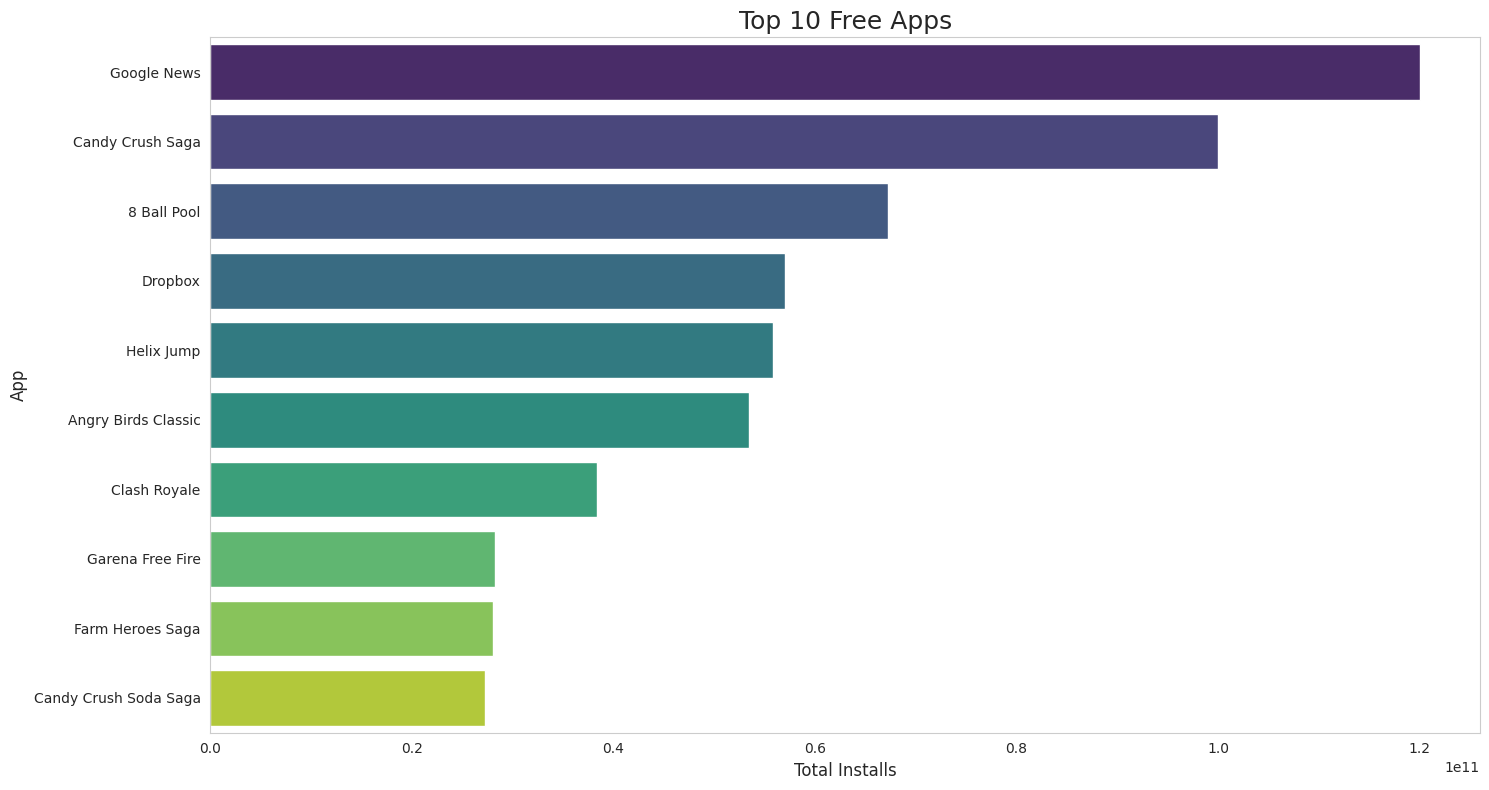

In [55]:
# top 20 free apps !!!
plt.figure(figsize=(15, 8))
sns.barplot(x='Installs', y='App', data=top_free_apps.head(10), palette='viridis')
plt.title('Top 10 Free Apps', fontsize=18)
plt.xlabel('Total Installs', fontsize=12)
plt.ylabel('App', fontsize=12)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To check which apps are in the top list in free type on the basis of the installs.

##### 2. What is/are the insight(s) found from the chart?



1. In this bar chart we can clearly see the dominance of few apps have significantly higher install counts compared to other apps.
2. The top free app belongs to diverse range of categories, including News,Gaming,Productivity and more this clearly indicate that no of installs app are not limited to single category for free apps.

1. The top 20 apps ranging from tens of billions to over a hundred billion this clearly indicates the reach and popularity of these leading free apps.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

1. Being the top free apps and seeing their success which clearly indicates the massive potential for user acquisition through a free model. It can be leverage by businesses to create high quality free apps with strong value propositions.
2. The high install of top apps validate the demand for certain types of apps within specific categories.This will guide businesses in identifying lucrative market segments for development.


3. This will significantly increases brand visibility and reach  which have a positive spillover effects on other products or services offered by the business


**Negative Business Impact:**

1. The dominance of few apps clearly signifies a highly competitive and potentially saturated market.It incredibly challenging for new free apps to gain significant traction and break into top ranks.
2. Competing with top free apps often requires a significant marketing investment to acquire users and gain visibility, which will be not that possible for small developers or those who have limited budget.


1. Due to success of top free apps it will create a benchmark for users expectations which will be require a significant efforts in development and design by developers.










#### Chart - 10

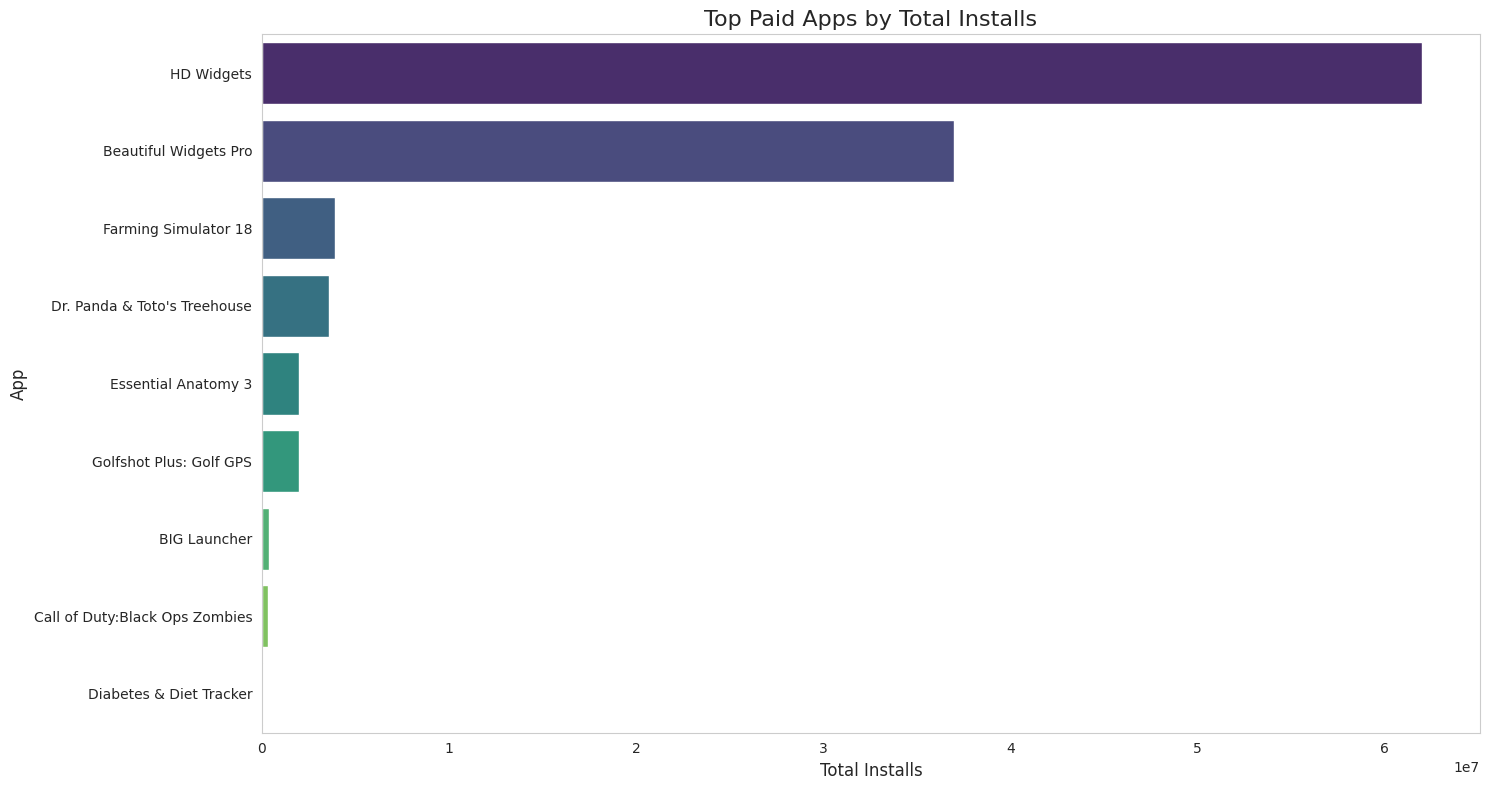

In [56]:
# Filter the merged dataframe to get only paid apps
paid_df = merge_df[merge_df['Type'] == 'Paid']

# Group by App and sum the installs to get total installs per app
paid_app_installs = paid_df.groupby('App')['Installs'].sum().reset_index()

top_paid_apps = paid_app_installs.nlargest(9,'Installs', keep='first')

# Chart visualization code for top paid apps
plt.figure(figsize=(15, 8))
sns.barplot(x='Installs', y='App', data=top_paid_apps, palette='viridis')
plt.title('Top Paid Apps by Total Installs', fontsize=16)
plt.xlabel('Total Installs', fontsize=12)
plt.ylabel('App', fontsize=12)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To visualize which top paid apps by installs and also to know the users adoption and what convincing them to purchase the app.

##### 2. What is/are the insight(s) found from the chart?



1. This chart clearly shows a considerable gap in install numbers between the top paid and the others apps which clearly show the dominance of few apps in the paid app in the dataset.
2. Due to low installs of paid apps we can indicate that the the paid market is generally smaller in terms of user base than the free app market.

1. The chart explicity names the apps that have achieved the highest install among the paid applications in the dataset,this is a valuable information which understand which paid apps have resonated most with users.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact:**
**bold text**
1. The top paid apps with significant install numbers validates that users are wiling to pay for certain apps which ultimately give confidence and a positive impact on businesses.
2. If top paid apps are under specific categories or offer particular functionalities, it can highlight successful niches within the paid market that businesses could target.


1. This provide a positive benchmark for constitutes a succesful paid application in terms of user acquistion.

**Negative Business Impact:**

1. Due to dominance of few apps in top position which makes a high competitive landscape which can be challenging for new paid apps to gain visibilty and acquire a significant user base and also require significant marketing efforts.
2. We can clearly see that as compare to free apps paid apps market has a smaller size due to which businesses rely solely on paid downloads might face limitations in scaling their user base.

1. top spots are held by established apps with a strong brand recognition, it can be difficult for newer or less-known paid apps to attract users, even if they offer similar or better features which give a negative impact on the new businesses in the market.










#### Chart - 11

In [57]:
# Does last updated has any effect on rating!!!
##first we have to convert last updated to datetime format.
merge_df['Last Updated'] = pd.to_datetime(merge_df['Last Updated'])



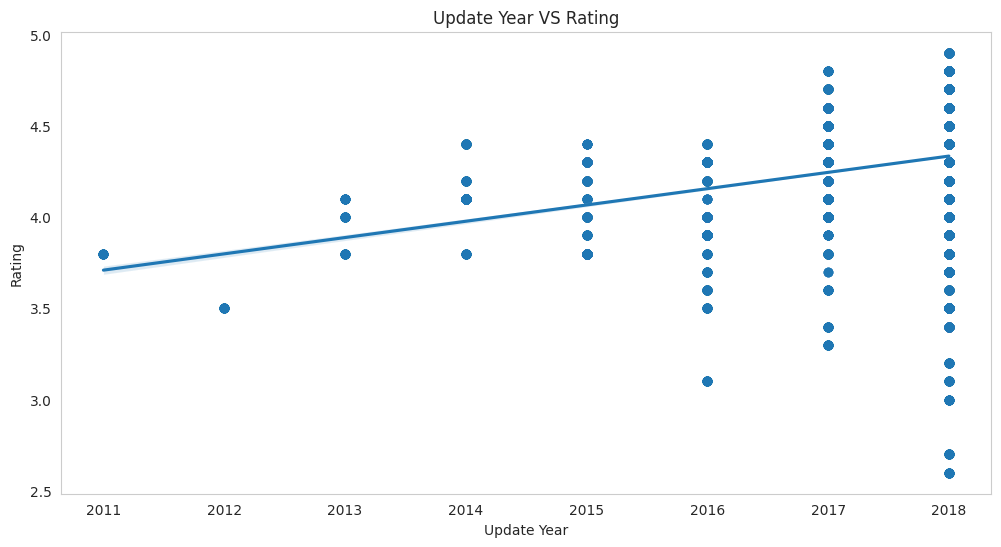

In [58]:
# Extract the year from the 'Last Updated' column and create a new 'Update year' column
merge_df['Update year'] = merge_df['Last Updated'].dt.year

#Last updated vs Rating!!
fig, ax = plt.subplots(figsize=(12,6))
sns.regplot(x="Update year", y="Rating", data=merge_df)
plt.title("Update Year VS Rating")
plt.xlabel("Update Year")
plt.ylabel("Rating")
plt.show()

##### 1. Why did you pick the specific chart?

We pick this visualization to investigate if there is a correlation between how recently an app was updated and its user rating.

##### 2. What is/are the insight(s) found from the chart?



1. It showing a upward trend of ratings in terms of year, this clearly suggest that regular updates are important for addressing bug if any, improving features, and keeping users satisfied.
2. It also reveal if user expectations or the quality standards on the Play Store have changed over the years i.e.influencing the ratings or apps that have not been updated recently.

1. We can also see that apps that have not been updated in a long time might have lower ratings due to compatibility issues with newer versions, unaddressed bugs, or outdated features.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact:**

1. We can a see a positive correlation between update year and rating which provides a strong business case for continously investing in app development,maintains and updates which ultimately rewards with the higher user satisfaction and better ratings.
2. Regularly update the apps are more stable and relevant to users, which lead to increased user retention, higher engagement, and positive word-of-mouth.


3. Regularly updated apps give a competitve edge to those apps which are not updated regularly or we say neglected which provide potentially attracting users who priortize up-to-date and well-maintained applications.


**Negative Business impact:**

1. For regularly updated apps requires maintenance which requires significant resources, including developer time and testing this can be a considerable challenge and expense which give negative impact on business.
2. Generally updates are positive but poorly executed update can introduce bugs, remove popular features which give negative impact on user experience, leading to a drop in ratings and user dissatisfaction.


3. There is also keep up pressure on businesses to update regularly as trend suggest that apps which don't update regularly might see their ratings stagnate or decline over time thus losing user trust.









#### Chart - 12

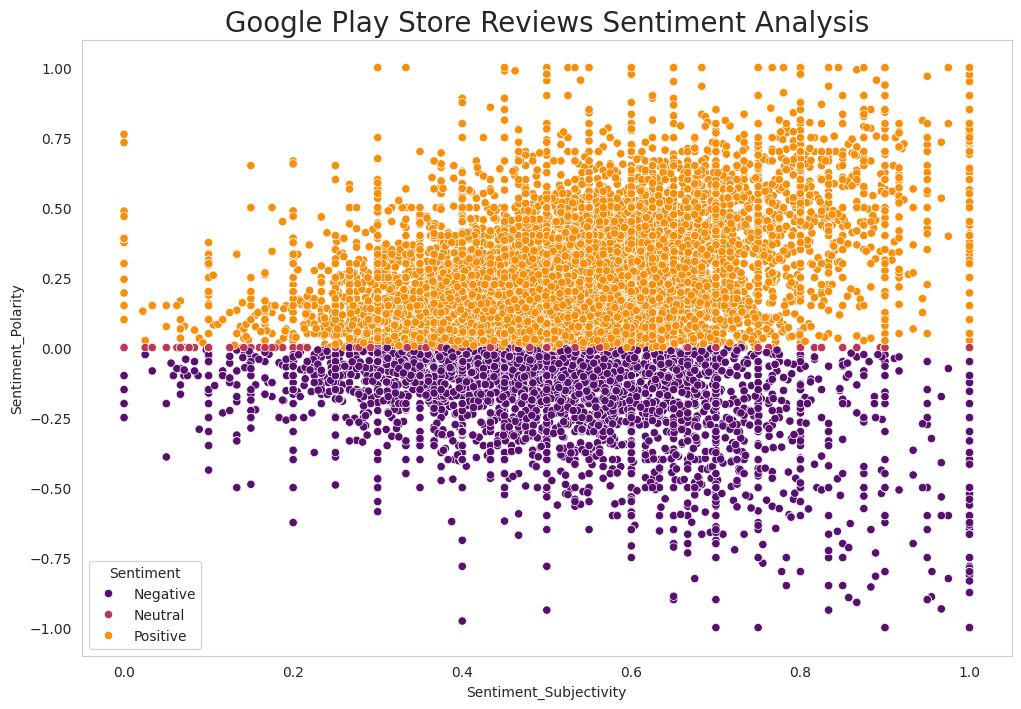

<Figure size 640x480 with 0 Axes>

In [59]:
# Is sentiment_subjectivity proportional to sentiment_polarity!!!
# scatterplot of sentiment polarity and sentiment subjectivity
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Sentiment_Subjectivity', y='Sentiment_Polarity', data=merge_df, hue = 'Sentiment', edgecolor='white', palette="inferno")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()
plt.tight_layout()

##### 1. Why did you pick the specific chart?

we choose this scatter plot to see the relationship between sentiment polarity with sentiment subjectivity which allows us for a visual exploration of how personal opinions(subjectivity) relate to emotional tone (polarity) of the user reviews.

##### 2. What is/are the insight(s) found from the chart?



1. In this scatter plot we can see clusters of points representing different sentiment categories in whicn upper half is concentrated with positive sentiments,while negative sentiments are in the lower side having low polarity.And neutral sentiments are clustered around zero(0) polarity.

2. Within each sentiment category,there's range of subjectivity scores


3. While there no linear proportionality, there seems to be tendency for reviews with higher subjectivity to have stronger sentiment polarity and reviews(low subjectivity) are more likely to be neutral or have polarity closer to zero
2.  As there is higher density of points in the upper and lower half of the chart which suggests that when users express strong opinions, they are often has a clear positive and negative sentiment.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**


1. Due to analysis of reviews often contain suggestions and detailed feedback that can be highly valuable for understanding user needs and making product improvements thus give positive impact on the product.
2. By identifying the key opnion leaders or we can say  by knowing the users which give a strong polarized positive review are valuable for marketing and community building.

1. Subjective reviews often provide context and reasons behind the expressed sentiment,analyszing this can help businesses to understand why users fee a certain way


**Negative Business Impact:**


1. Reviews with low subjectivity and neutral or weak polarity indicate functional issues that are not strongly emotional. While important for bug fixes, these reviews might be harder to priotize if the focus is soley on highly emotional feedback.
2. Sometimes subjective reviews especially negative ones, might be based on personal preferences so Businesses should be careful not to overreact to individual feedback without considering the overall sentiment and frequency of comments which leads to negative impact on business.


3. If many negative reviews are higly subjective it might indicate that the apps is not meet with personal preferences which could be challenging to address as it may require significant changes or targeting a more specific users.










#### Chart - 13  **Percentage of Review Sentiments!!!

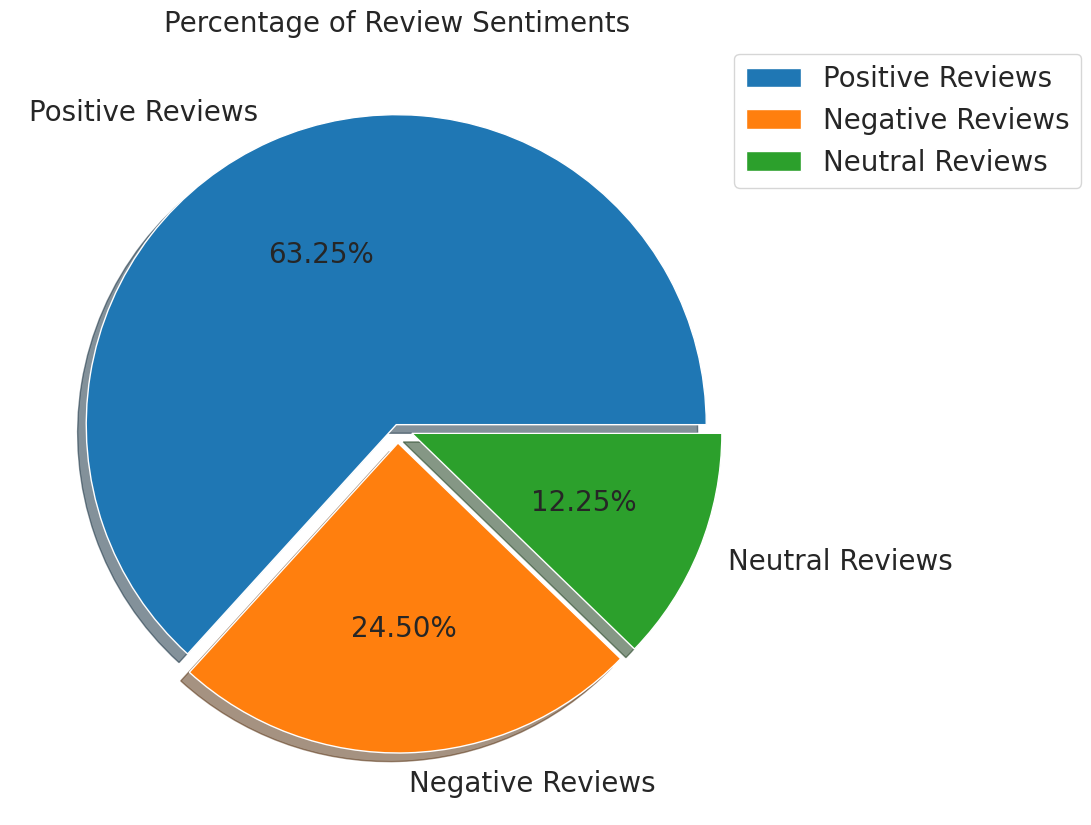

In [60]:
## Create a pie chart to show the distribution.
counts = list(merge_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10, 15)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

In [61]:
#@title App with the highest number of positive review!!
positive_merge_df=merge_df[merge_df['Sentiment']=='Positive']
positive_merge_df.head


<bound method NDFrame.head of                                        App        Category  Rating  Reviews  \
4                      Coloring book moana  ART_AND_DESIGN     3.9      967   
8                      Coloring book moana  ART_AND_DESIGN     3.9      967   
9                      Coloring book moana  ART_AND_DESIGN     3.9      967   
10                     Coloring book moana  ART_AND_DESIGN     3.9      967   
11                     Coloring book moana  ART_AND_DESIGN     3.9      967   
...                                    ...             ...     ...      ...   
122578  Firefox Focus: The privacy browser   COMMUNICATION     4.4    36981   
122579  Firefox Focus: The privacy browser   COMMUNICATION     4.4    36981   
122581  Firefox Focus: The privacy browser   COMMUNICATION     4.4    36981   
122589  Firefox Focus: The privacy browser   COMMUNICATION     4.4    36981   
122617  Firefox Focus: The privacy browser   COMMUNICATION     4.4    36981   

        Size  Installs  Type  Price Content Rating                     Genres  \
4       14.0    500000  Free    0.0       Everyone  Art & Design;Pretend Play   
8       14.0    500000  Free    0.0       Everyone  Art & Design;Pretend Play   
9       14.0    500000  Free    0.0       Everyone  Art & Design;Pretend Play   
10      14.0    500000  Free    0.0       Everyone  Art & Design;Pretend Play   
11      14.0    500000  Free    0.0       Everyone  Art & Design;Pretend Play   
...      ...       ...   ...    ...            ...                        ...   
122578   4.0   1000000  Free    0.0       Everyone              Communication   
122579   4.0   1000000  Free    0.0       Everyone              Communication   
122581   4.0   1000000  Free    0.0       Everyone              Communication   
122589   4.0   1000000  Free    0.0       Everyone              Communication   
122617   4.0   1000000  Free    0.0       Everyone              Communication   

        ... Current Ver   Android Ver  \
4       ...       2.0.0  4.0.3 and up   
8       ...       2.0.0  4.0.3 and up   
9       ...       2.0.0  4.0.3 and up   
10      ...       2.0.0  4.0.3 and up   
11      ...       2.0.0  4.0.3 and up   
...     ...         ...           ...   
122578  ...         5.2    5.0 and up   
122579  ...         5.2    5.0 and up   
122581  ...         5.2    5.0 and up   
122589  ...         5.2    5.0 and up   
122617  ...         5.2    5.0 and up   

                                        Translated_Review Sentiment  \
4                                I love colors inspyering  Positive   
8                                                It cute.  Positive   
9                                                  I love  Positive   
10                                                   Love  Positive   
11                                   I love enjoyable fun  Positive   
...                                                   ...       ...   
122578  Great Relief unwanted pop ups showing up. What...  Positive   
122579  Hoped found new go-to; LOVE Firefox PC. Aside ...  Positive   
122581  Fast, lightweight secure. What else need? :) T...  Positive   
122589  Best browser... If privacy concern please brow...  Positive   
122617  The thing I found missing simple bookmark draw...  Positive   

       Sentiment_Polarity  Sentiment_Subjectivity  category_installs  \
4                0.500000                0.600000          716700000   
8                0.500000                1.000000          716700000   
9                0.500000                0.600000          716700000   
10               0.500000                0.600000          716700000   
11               0.433333                0.466667          716700000   
...                   ...                     ...                ...   
122578           0.650000                0.625000       283781000000   
122579           0.345455                0.484848       283781000000   
122581           0.493750                0.700000     

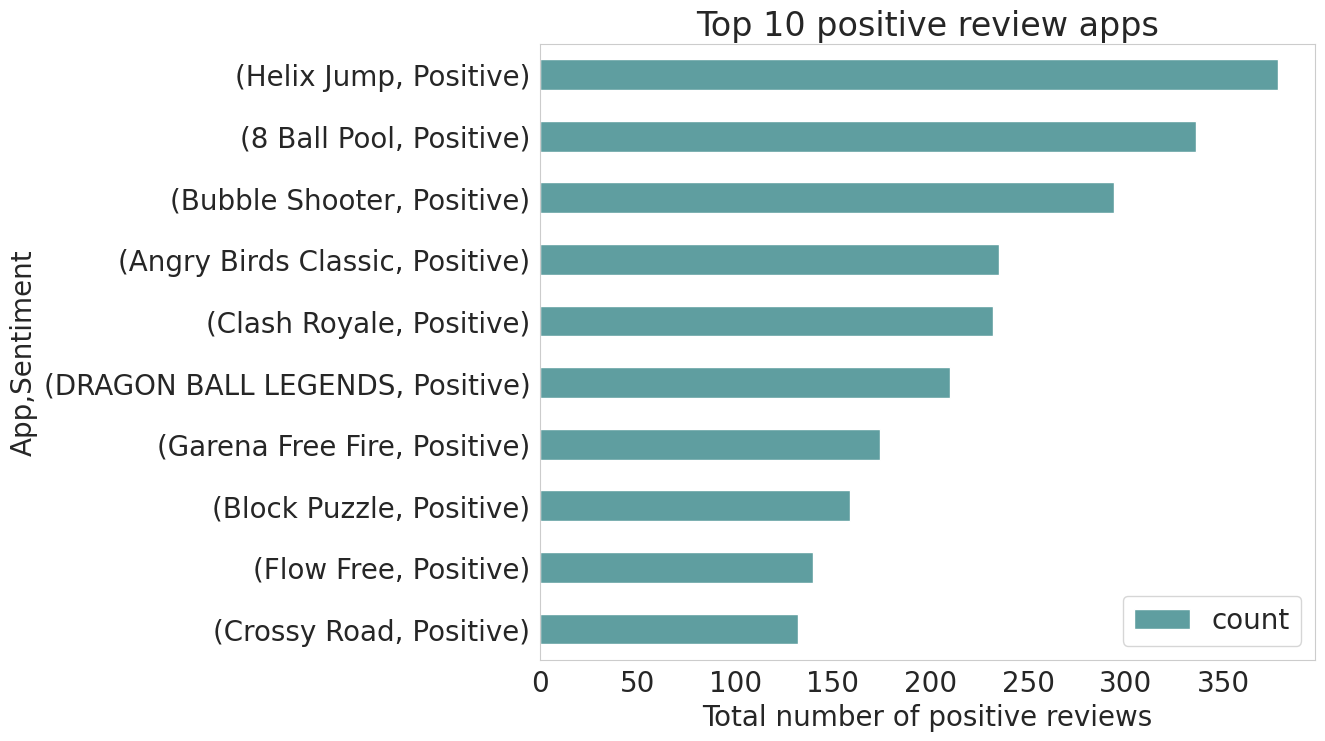

In [62]:
positive_merge_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='cadetblue').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

In [63]:
#@title App with highest number negative review!!!
negative_merge_df=merge_df[merge_df['Sentiment']=='Negative']
negative_merge_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,category_installs,Last_Updated,Rating_group,Update year
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000,716700000,2018-01-15,Above Average,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333,716700000,2018-01-15,Above Average,2018
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000,716700000,2018-01-15,Above Average,2018
13,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,It horrible even zoom color,Negative,-1.000000,1.000000,716700000,2018-01-15,Above Average,2018
15,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,It stoepet game,Negative,-0.400000,0.400000,716700000,2018-01-15,Above Average,2018
17,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,It missing filling,Negative,-0.200000,0.050000,716700000,2018-01-15,Above Average,2018
20,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,hate it.,Negative,-0.800000,0.900000,716700000,2018-01-15,Above Average,2018
62,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,...,2.9.2,3.0 and up,I really enjoying application. My complaint sm...,Negative,-0.034722,0.581944,716700000,2017-09-20,Top rated,2017
63,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,...,2.9.2,3.0 and up,"People thinks game dumb, ok.But game soo fun ....",Negative,-0.012500,0.383333,716700000,2017-09-20,Top rated,2017
64,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,...,2.9.2,3.0 and up,This work first place. Keeps asking permission...,Negative,-0.375000,0.616667,716700000,2017-09-20,Top rated,2017


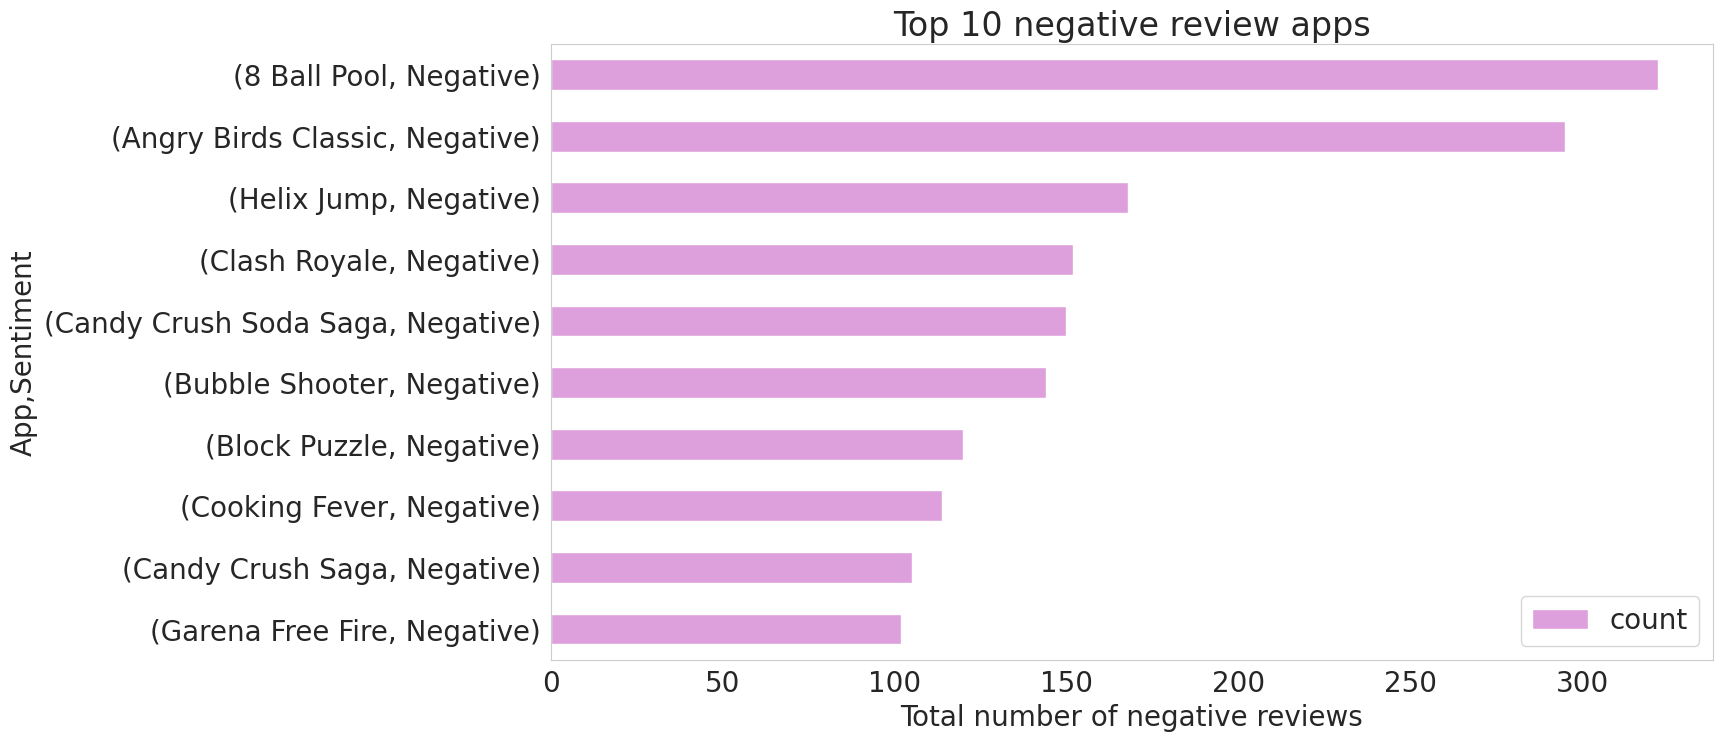

In [64]:
negative_merge_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='plum').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

##### 1. Why did you pick the specific chart?

We pick this charts to check the how much percentage distribute to review sentiments and also to check apps with highest number of positive and negative review.

##### 2. What is/are the insight(s) found from the chart?


**Percentage of Review Sentiments Pie Chart:**
1. In this pie chart we clearly see the overall distribution of sentiments in the user review, we can see proportion of positive reviews(63.56%), negative reviews(23.91%), neutral reviews(12.53%).
2.A high percentage of positive reviews would indicate general user satisfaction with the apps in the dataset.


3. A significant percentage of negative review would highlight areas for potential improvement or common pain points experienced by users.
2. The proportion of neutral review might indicate reviews that are more objective,descriptive or lack a strong emotional tone.

**Top apps with Positive Reviews:**


1. In this bar chart we clearly see the specific apps are receiving the most positive feedback.
2. In this we say that these apps are performing well and meet user expectations, and potentially have a strong and satisfied user base.


3. By this findings we can know what features,functionalities or overall user experiences are leading to positive sentiment.

**Top Apps with Negative Review:**

1. This bar chart indicates the no of apps has the most negative feedback.
2. We can say these negatvie feedback are due to some issues,bugs or aspects that are frustrataing users.


1. highlights of this chart can probably play crucial role for developers to prioritize fixes, address user concerns and improve the apps quality.














##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

1. A high percentage of positive reviews and the identification of your app among the top positively reviewed apps are strong indicators of good app performance and user satisfaction.This can boost confidence and inform successful strategies.
2. By knowing the apps receive the most positive reviews allows businesses to leverage this in their campaigns and branding which can attract new users.


3. Analyzing the positive reviews for top-performing apps can help identify specific features,aspects,or user experiences.This knowledge can be used to replicate success in other apps or future updates.
2. The positive reviewed apps sets a benchmark for what is achievable in terms of user satisfaction and positive feedback within the market.





#### Chart - 14 - Correlation Heatmap

In [65]:
# Correlation Heatmap for playstore dataset!!
# Select only numerical columns before calculating correlation and pairplot.
numerical_df = merge_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
display(correlation_matrix)

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity,category_installs
Rating,1.000000,0.215685,0.010112,0.033259,-0.017183,0.062179,0.072274,0.258109
Reviews,0.215685,1.000000,0.211825,0.407493,-0.030231,-0.129917,-0.002017,0.378011
Size,0.010112,0.211825,1.000000,0.102234,-0.021586,-0.093003,0.021772,0.195425
Installs,0.033259,0.407493,0.102234,1.000000,-0.029972,-0.097208,-0.010738,0.265638
Price,-0.017183,-0.030231,-0.021586,-0.029972,1.000000,0.027180,-0.001774,-0.050869
Sentiment_Polarity,0.062179,-0.129917,-0.093003,-0.097208,0.027180,1.000000,0.247262,-0.196592
Sentiment_Subjectivity,0.072274,-0.002017,0.021772,-0.010738,-0.001774,0.247262,1.000000,0.019486
category_installs,0.258109,0.378011,0.195425,0.265638,-0.050869,-0.196592,0.019486,1.000000


Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

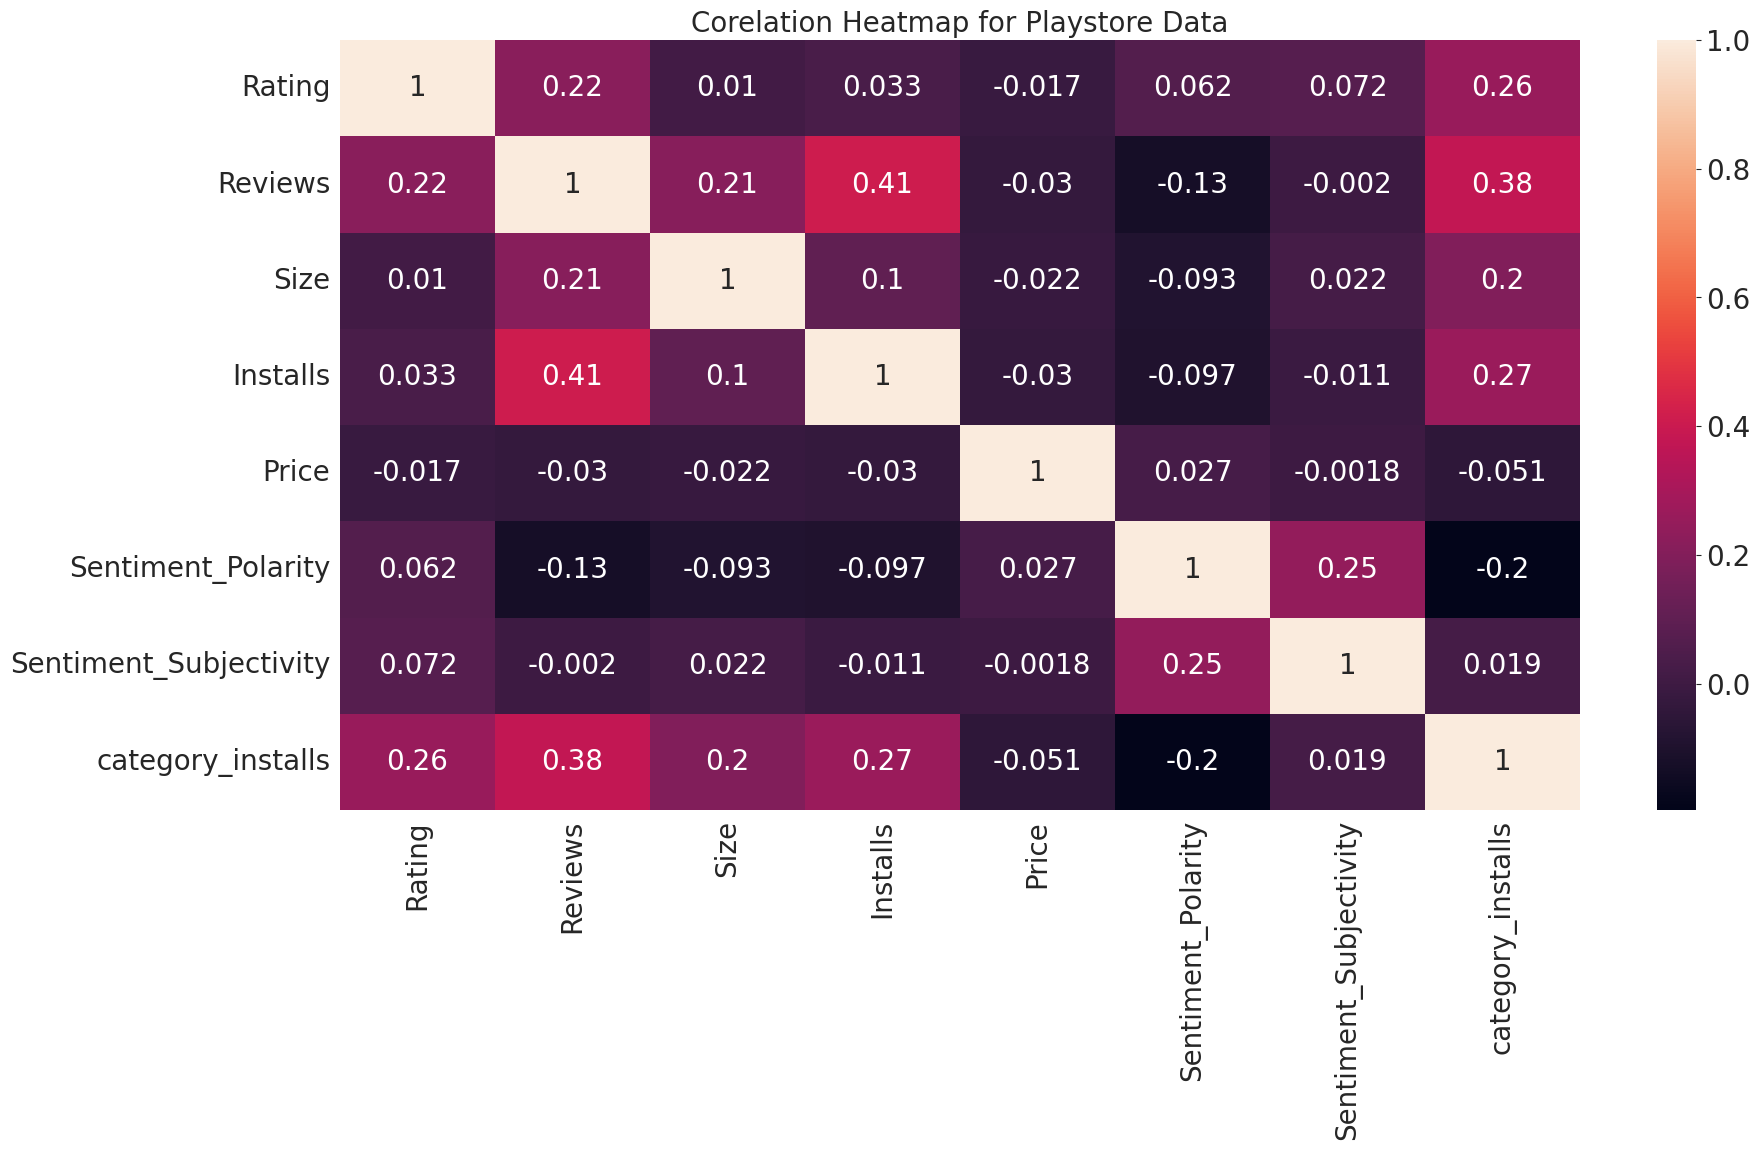

In [66]:
# Heat map for play_store
plt.figure(figsize = (20,10))
sns.heatmap(correlation_matrix, annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

##### 1. Why did you pick the specific chart?

To understand the correlation or relationship between multiple numerical variables simultaneously present in dataset.

##### 2. What is/are the insight(s) found from the chart?



1. In this heat map we can see a moderate positive correlation in Reviews and Intalls i.e.(0,41) which indicates that more reviews often link more higher number of installs.
2. we can see that Reviews and Ratings have a weak positive correlation(0.22) by which we can say that apps with more reviews have higher ratings but it is not happening for most of the cases,as it not has very strong relationship.

1. Category Installs and Rating also have a weak positive correlation i.e.(0.26) which is not that strong relationship.
2. we also see negative relationship in this heatmap between Reviews and Sentiment Polarity(-0.13), it represent that when number of reviews increases sentiment polarity decreases it can be because of apps with a large no. of reviews are more likely to receive some negative feedback as their users base must be grows and become more diverse.

1. By analyze this chart we can say that most of the other numerical variables show very weak correlation which close to 0.This indicates that these pairs of variables do not have a strong linear relationship in this dataset.








#### Chart - 15 - Pair Plot

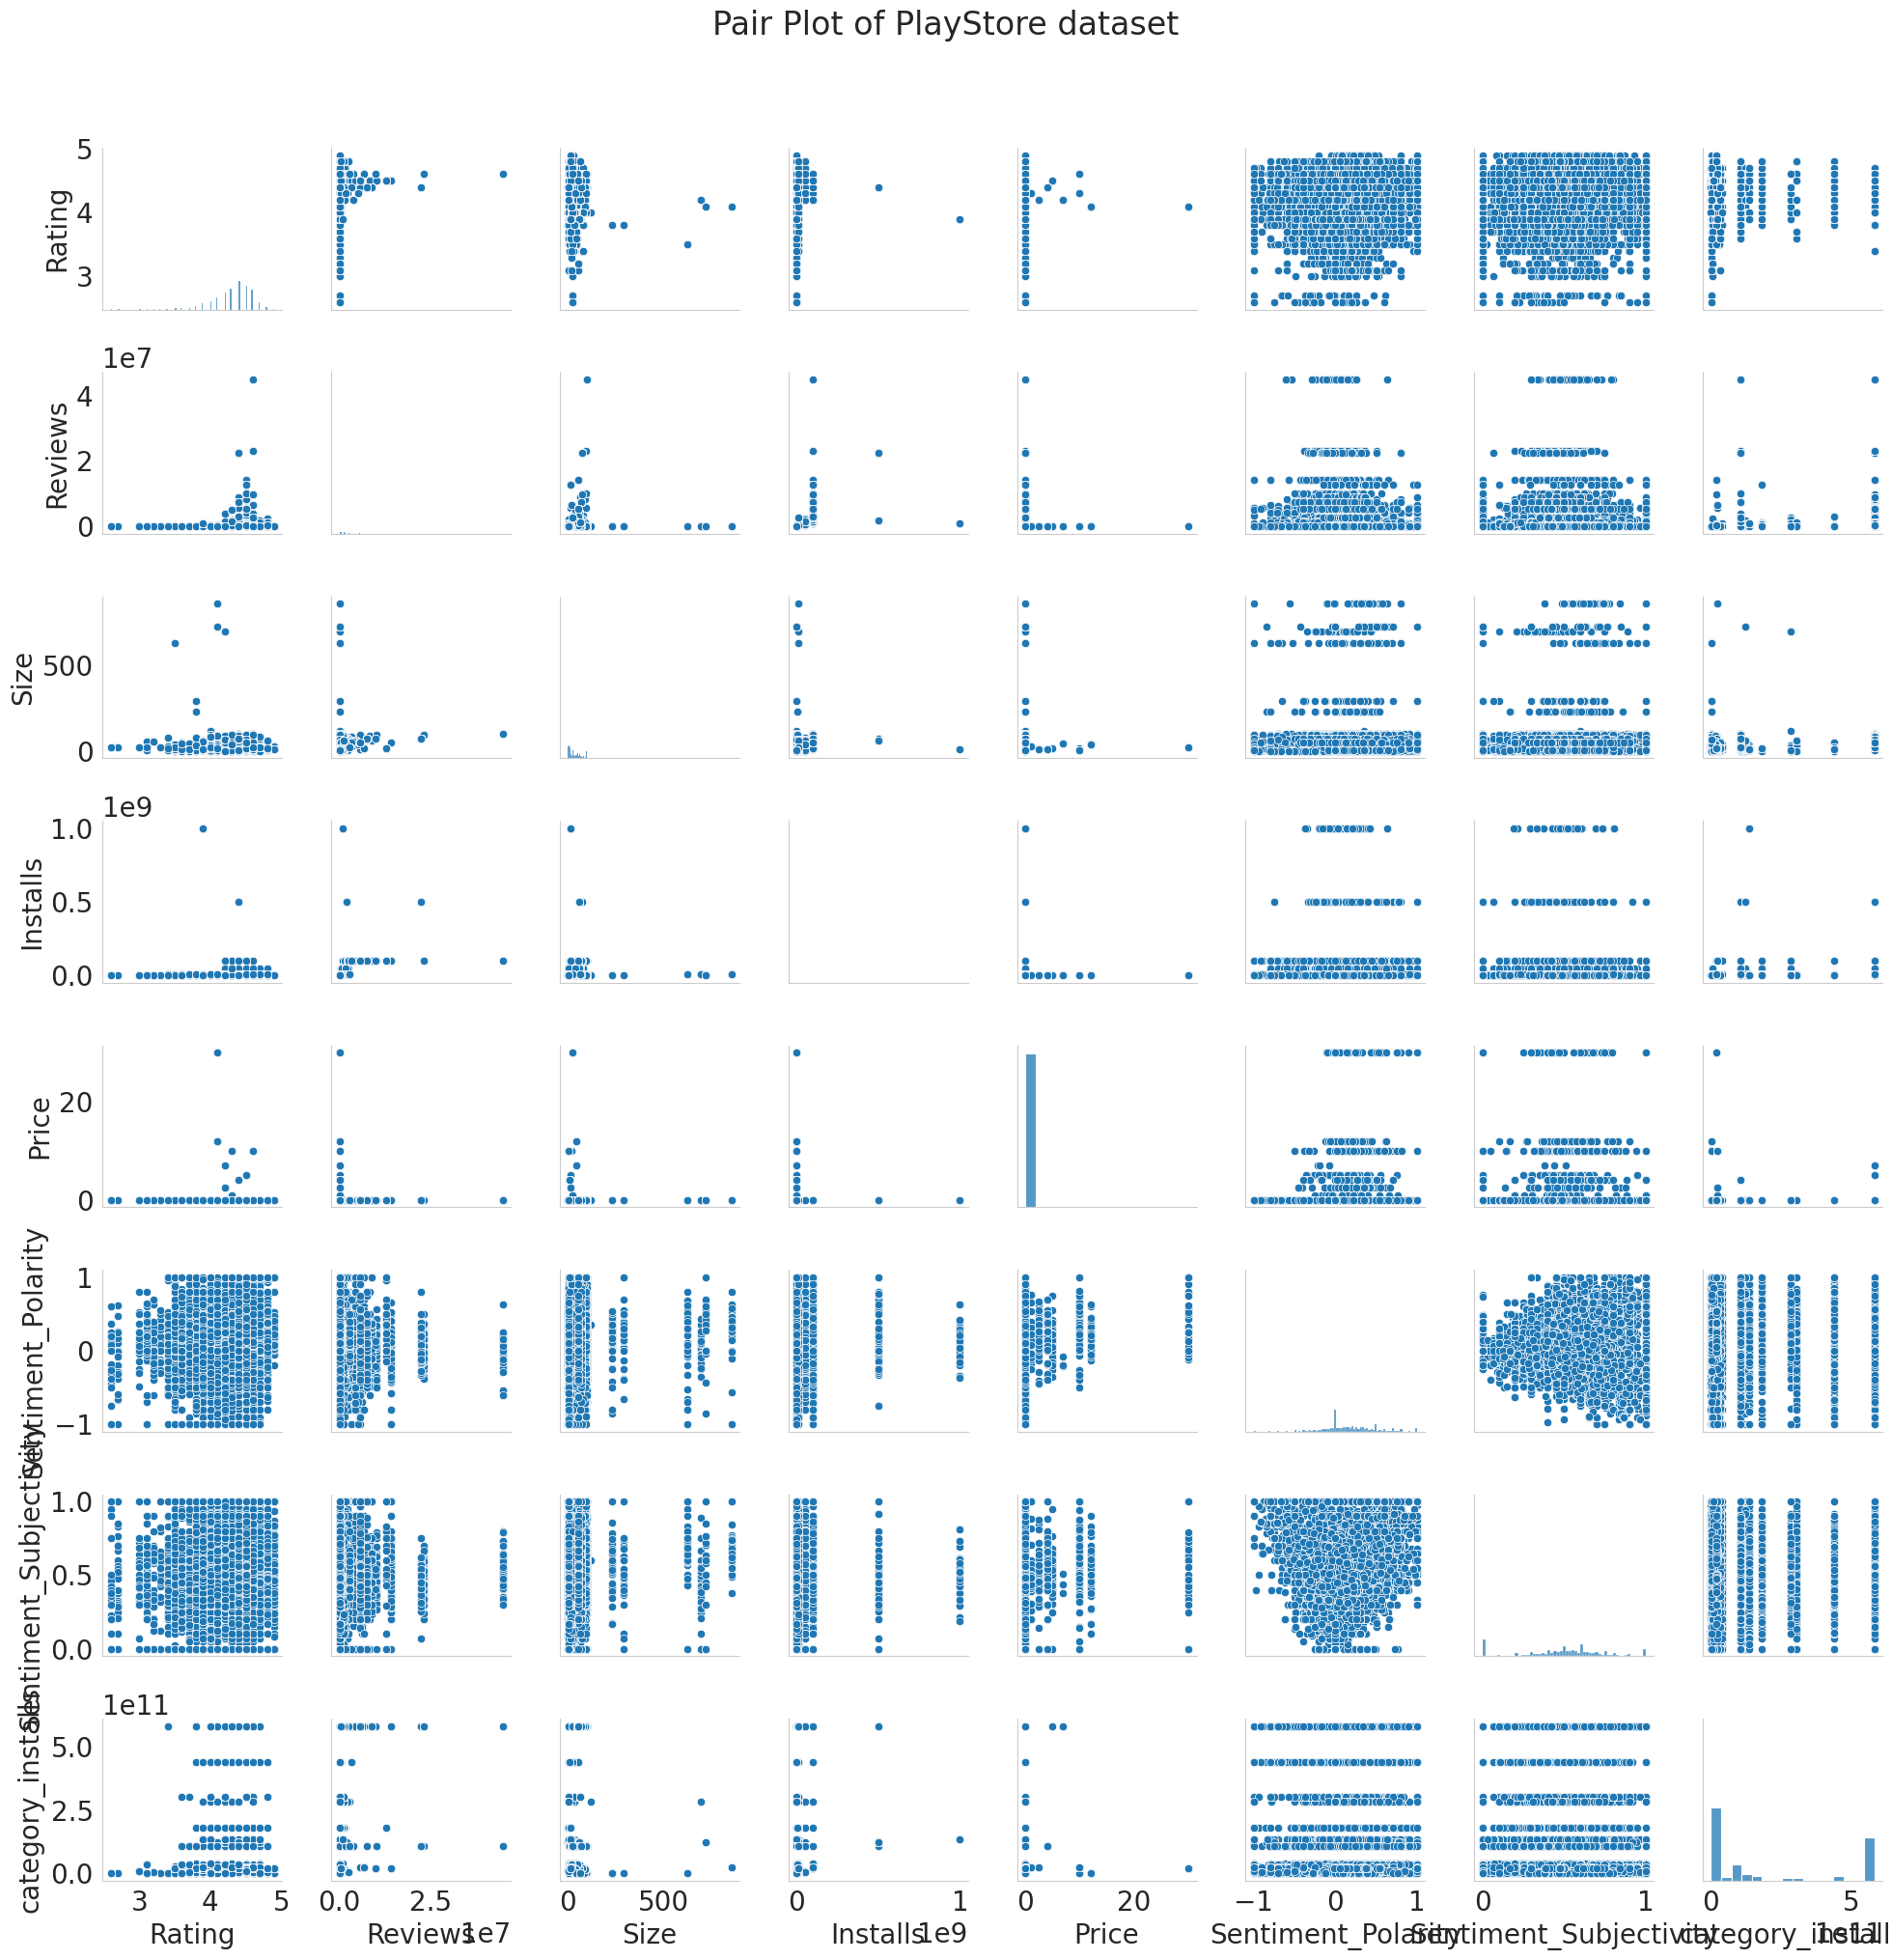

In [69]:
# Pair Plot!!!
sns.pairplot(numerical_df)
plt.suptitle('Pair Plot of PlayStore dataset', y=1.02) #Add super title for all plots.
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the relationship between the variables in a grid of scatterplots which help to analyze the linear relationships,clusters or any pattern present.We can also used to identify any outliers presence in the dataset(which is far away from the main cluster in these scatter plots).

We can also explore multivariate relationship to some extent by seeing multiple plots simultaneously.

##### 2. What is/are the insight(s) found from the chart?



1. We can see the distribution of different variables in this pair plot:
       

*  Rating:The distribution of rating is skewed towards higher values(4.0 and above).
 *   In this we can see Both Reviews and Installs are heavily skewed towars lower values, with a  very few apps having extremely high numbers.
 * The distribution of Size is also higher with many apps in smaller size range.

 *  Sentiment subjectivity distribution is spread out between 0 and 1, with a tendency towards higher subjectivity.




2. Relationship between Variables:

   * In this we clearly see a positive relationship, but it is non linear due to the skewed distribution.Apps with more reviews generally have more installs.
  * This scatter plot does not show a strong linear relationship we can say that high-rated apps exist across various sizes.

 *  In this plots Price vs other vairables show that most apps have a price of 0 with a few data points scattered for paid apps.This visually confirms that most apps are free and there is no strong linear relationship between price and other metrics.



3. In this scatter plots especially those involving Reviews and Installs, show several points that are far away from the main concentration of dots, these dots are considered to outliers presence in dataset.










## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Based on the analysis of the Play Store apps and user reviews dataset, here are some suggestions for the clients to achieve their business objectives:

1. **Focus on High-Performing Categories:** The analysis showed that **Game,Family,Health and Fitness,Travel and Local and Tools** are among the top categories with the highest number of apps and/or total installs.Clients looking to enter or expand in the PlayStore market should consider focusing their efforts on these categories due to their high users engagement and potential for downloads.
2. **Priortize the free app model,but explore paid Niches** The vast majority of apps in the dataset are Free(around 98.73%). This suggests that a Free app model is crucial for achieving a large user base and high install numbers.

 However, the analysis of top paid apps shows that there are successful paid apps with significant intalls(i.e. HD Widgets,Beautiful Widgets pro).

 If the business objective is revenue generation through direct sales, identifying and targeting successful niches within the paid app market could be a viable strategy, focusing on high-quality, specialized applications.


**3.Emphasize App Quality and User Satisfaction**  As we see in analysis that there is a positive correlation between Rating and Reviews/Installs, and majority of apps are rated as "Top rated". This highlights the importance of developing high-quality apps that meet user expectations.Encouraging users to leave reviews and actively responding to feedback can help improve ratings and build a positive reputation, which in turn drive more installs which ultimatley give profits to businesses.

4.**Regularly Update the Apps:** In this analysis we see a positive relationship between the "Last Updated" year and Rating.Regularly updating the apps is important removing bugs, improving features, maintaining comptability with newer Andriod versions, and keeping users engaged which ultimatley contribute to higher ratings and user satisfaction over time.

5.**Leverage Sentiment analysis for Improvement:**The sentiment analysis revealed a significant portion of both positive and negative reviews.We suggest clients to actively analyze user reviews,particularly the negative ones,to identify specific pain points,bugs,or desired features.By addressing these issues, directly based on user feedback which lead to significant improvements in app quality and user satisfaction which build trust of user also and ultimately show a positive impact of business in playstore.

6.**Analyze Competitors in Top Categories:**For categories with high competition (like Game and Family), it would be beneficial to conduct a deeper analysis of the top-performing apps i.e. Understanding their key features, monetization strategies,update frequencies, and user feedback can provide valuable competitve intelligence to the clients.

7**.Consider Content Rating Targeting:** Here "Everyone" content Rating is the dominant content rating,understanding the distribution across other ratings can help clients tailor their app content and marketing strategies to concise their target audience.

**By considering these areas, clients can levarage the insights from this dataset to make data-driven decisions that can positively impact thier apps performance and achieve their business objective in the PlayStore market.**










# **Conclusion**

Based on the exploratory data anaylsis of the Play Store apps user reviews datatset, we can conclude that the analysis revealed several key features and trends within the Play Store market.The market is dominated by Free apps and certain categories like Game,Family and tools have the highest number of apps and installs, indicating strong user demand and competition in these areas.

User satisfaction, as reflected in app ratings, is generally high, with a large proportion of apps falling into the "Top rated" category. There is a positive relationship between the number of reviews and installs, suggesting that popular apps tend to receive more feedback.While a slight positive correlation exists between ratings and review/installs, but it is not a strong relationship.

The size of the apps does not appear to have significant linear impact on its rating.The content rating indicates that the majority of apps are suitable for"Everyone" highlighting a broad target audience for most applications.

Sentiment analysis of user revies shows a higher percentage of positive sentiments compared to negative or neutral ones. The relationship between sentiment polarity and subjectivity suggests that more opinionated reviews tend to have a clearer positive or negative tone

Correlation Heatmap and Pairplot also showing various relationship between the variables in which most of the relationship are positive but not that much strong and we also see negative relationship in some variables.

Finally, the analysis hints at the importance of regualr updates as there appears to be a positive association between the recency of an update and app ratings.

In the Play Store market appears to be driven by factors such as belonging to a popualr category,offering a free model maintaning high app quality to garnish positive ratings and reviews, and consistently updating the application to meet user expectations and address issues.
Businesses looking to thrive in the ecosystem should focus on these aspects while leveraging user feedback to inform their development and marketing stragies.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***